# Analysis of apartments for sale advertisements

## <font color='blue'>Importing necessary libraries</font>

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import os

import warnings
warnings.simplefilter('ignore')

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

## <font color='blue'>Importing data</font>

In [2]:
path1 = r'C:\Users\exeve\Downloads\real_estate_data.csv'
path2 = '/datasets/real_estate_data.csv'

try:
    if os.path.exists(path1):
        data = pd.read_csv(path1, sep='\t')
    elif os.path.exists(path2):
        data = pd.read_csv(path2, sep='\t')
except:
    print('Something went wrong')

## <font color='blue'>Examination of the data</font>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

- We can see that there are a lot of missing values in several columns. The method of filling in the blanks will be determined at the time of studying each column.

In [4]:
display(data.head(20))

total_images  last_price  total_area first_day_exposition  rooms  \
0             20  13000000.0      108.00  2019-03-07T00:00:00      3   
1              7   3350000.0       40.40  2018-12-04T00:00:00      1   
2             10   5196000.0       56.00  2015-08-20T00:00:00      2   
3              0  64900000.0      159.00  2015-07-24T00:00:00      3   
4              2  10000000.0      100.00  2018-06-19T00:00:00      2   
5             10   2890000.0       30.40  2018-09-10T00:00:00      1   
6              6   3700000.0       37.30  2017-11-02T00:00:00      1   
7              5   7915000.0       71.60  2019-04-18T00:00:00      2   
8             20   2900000.0       33.16  2018-05-23T00:00:00      1   
9             18   5400000.0       61.00  2017-02-26T00:00:00      3   
10             5   5050000.0       39.60  2017-11-16T00:00:00      1   
11             9   3300000.0       44.00  2018-08-27T00:00:00      2   
12            10   3890000.0       54.00  2016-06-30T00:00:00      2   
13            20   3550000.0       42.80  2017-07-01T00:00:00      2   
14             1   4400000.0       36.00  2016-06-23T00:00:00      1   
15            16   4650000.0       39.00  2017-11-18T00:00:00      1   
16            11   6700000.0       82.00  2017-11-23T00:00:00      3   
17             6   4180000.0       36.00  2016-09-09T00:00:00      1   
18             8   3250000.0       31.00  2017-01-27T00:00:00      1   
19            16  14200000.0      121.00  2019-01-09T00:00:00      3   

    ceiling_height  floors_total  living_area  floor is_apartment  studio  \
0             2.70          16.0        51.00      8          NaN   False   
1              NaN          11.0        18.60      1          NaN   False   
2              NaN           5.0        34.30      4          NaN   False   
3              NaN          14.0          NaN      9          NaN   False   
4             3.03          14.0        32.00     13          NaN   False   
5              NaN          12.0        14.40      5          NaN   False   
6              NaN          26.0        10.60      6          NaN   False   
7              NaN          24.0          NaN     22          NaN   False   
8              NaN          27.0        15.43     26          NaN   False   
9             2.50           9.0        43.60      7          NaN   False   
10            2.67          12.0        20.30      3          NaN   False   
11             NaN           5.0        31.00      4        False   False   
12             NaN           5.0        30.00      5          NaN   False   
13            2.56           5.0        27.00      5          NaN   False   
14             NaN           6.0        17.00      1          NaN   False   
15             NaN          14.0        20.50      5          NaN   False   
16            3.05           5.0        55.60      1          NaN   False   
17             NaN          17.0        16.50      7          NaN   False   
18            2.50           5.0        19.40      2          NaN   False   
19            2.75          16.0        76.00      8          NaN   False   

    open_plan  kitchen_area  balcony              locality_name  \
0       False         25.00      NaN            Санкт-Петербург   
1       False         11.00      2.0             посёлок Шушары   
2       False          8.30      0.0            Санкт-Петербург   
3       False           NaN      0.0            Санкт-Петербург   
4       False         41.00      NaN            Санкт-Петербург   
5       False          9.10      NaN  городской посёлок Янино-1   
6       False         14.40      1.0          посёлок Парголово   
7       False         18.90      2.0            Санкт-Петербург   
8       False          8.81      NaN             посёлок Мурино   
9       False          6.50      2.0            Санкт-Петербург   
10      False          8.50      NaN            Санкт-Петербург   
11      False          6.00      1.0                  Ломоносов   
12

<Axes: >

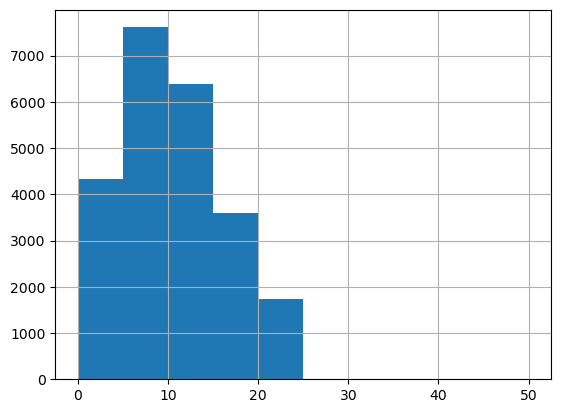

In [5]:
data['total_images'].hist()

Most listings have between 0 and 30 photos. There are no negative values.

<Axes: >

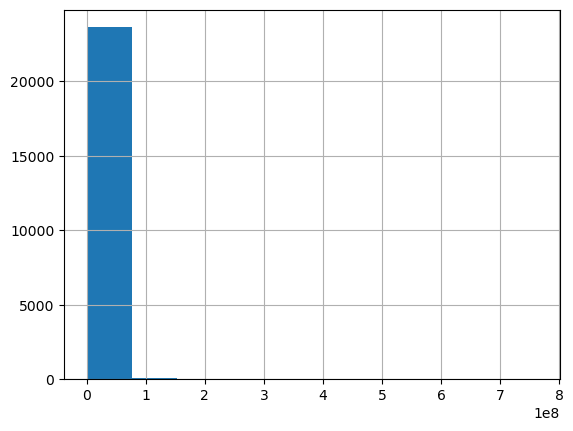

In [6]:
data['last_price'].hist()

Most apartments cost less than 100 million.

<Axes: >

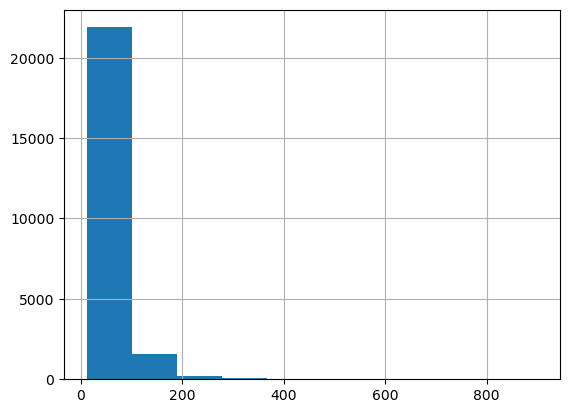

In [7]:
data['total_area'].hist()

Most properties have a total area of less than 200 square meters.

<Axes: >

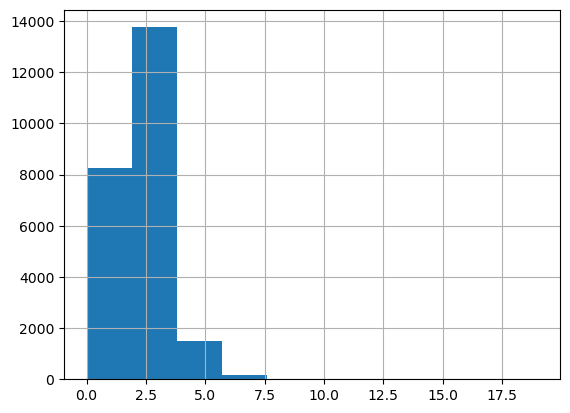

In [8]:
data['rooms'].hist()

The number of rooms is usually less than 10. We need to make sure that there are no zeros.

<Axes: >

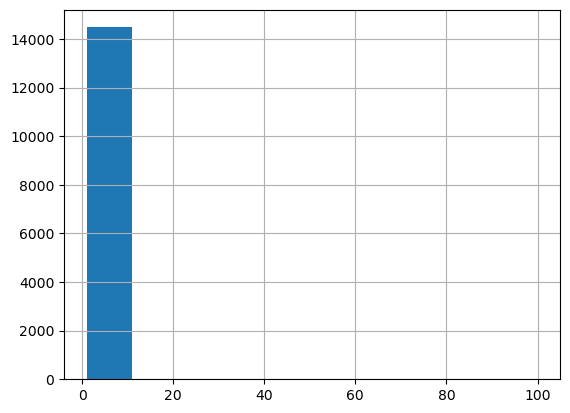

In [9]:
data['ceiling_height'].hist()

Ceiling heights generally do not exceed 10 m. Reasonable values will need to be explored.

<Axes: >

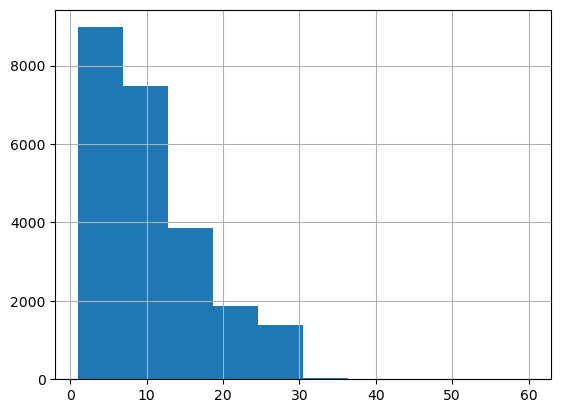

In [10]:
data['floors_total'].hist()

The total number of floors is mostly less than 30.

<Axes: >

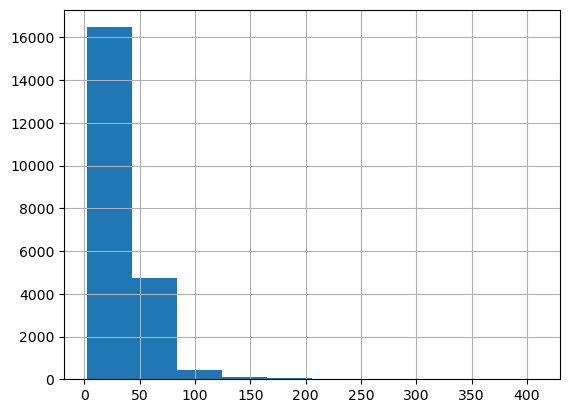

In [11]:
data['living_area'].hist()

The living area is generally up to 200 square meters.

<Axes: >

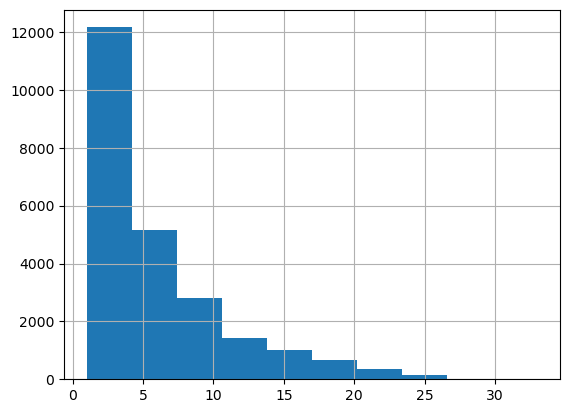

In [12]:
data['floor'].hist()

The floor number is less than the total number of floors there can be. There are no zero floors.

<Axes: title={'center': 'is apartment'}>

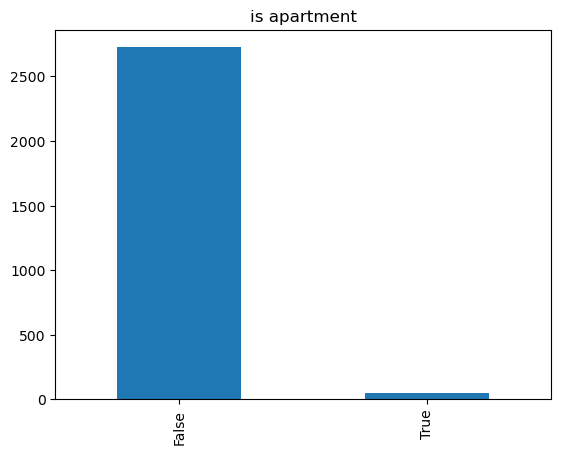

In [13]:
data['is_apartment'].value_counts().plot(kind='bar', 
                                     title='is apartment')

Most are not apartment suites.

<Axes: title={'center': 'Studio'}>

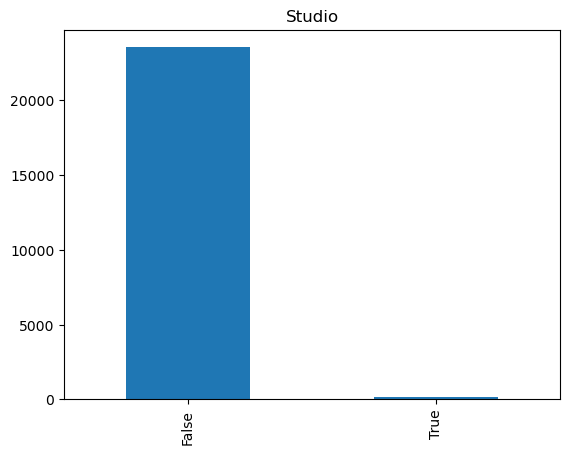

In [14]:

data['studio'].value_counts().plot(kind='bar', 
                                     title='Studio')

Most are not studio apartments.

<Axes: title={'center': 'Open Plan'}>

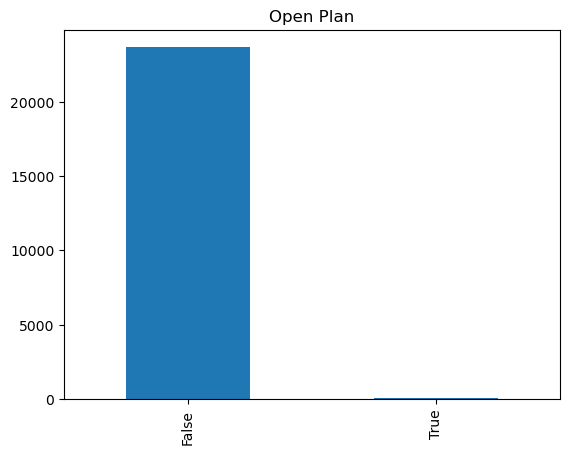

In [15]:
data['open_plan'].value_counts().plot(kind='bar', 
                                     title='Open Plan')

Most are not open plan apartments.

<Axes: >

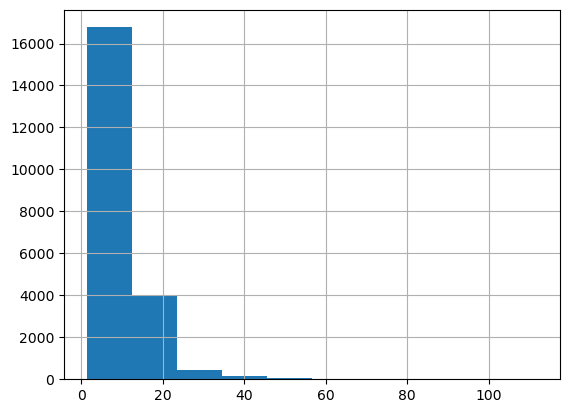

In [16]:
data['kitchen_area'].hist()

In most, the kitchen area is less than 60 square meters.

<Axes: >

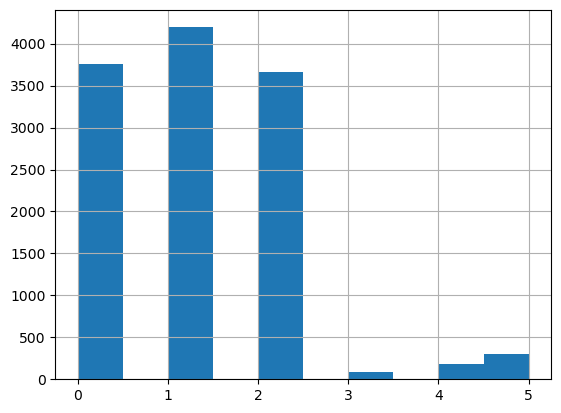

In [17]:
data['balcony'].hist()

There are no negative numbers or strange values. We will take a closer look at apartments with more than 3 balconies. These have an uneven distribution.

<Axes: >

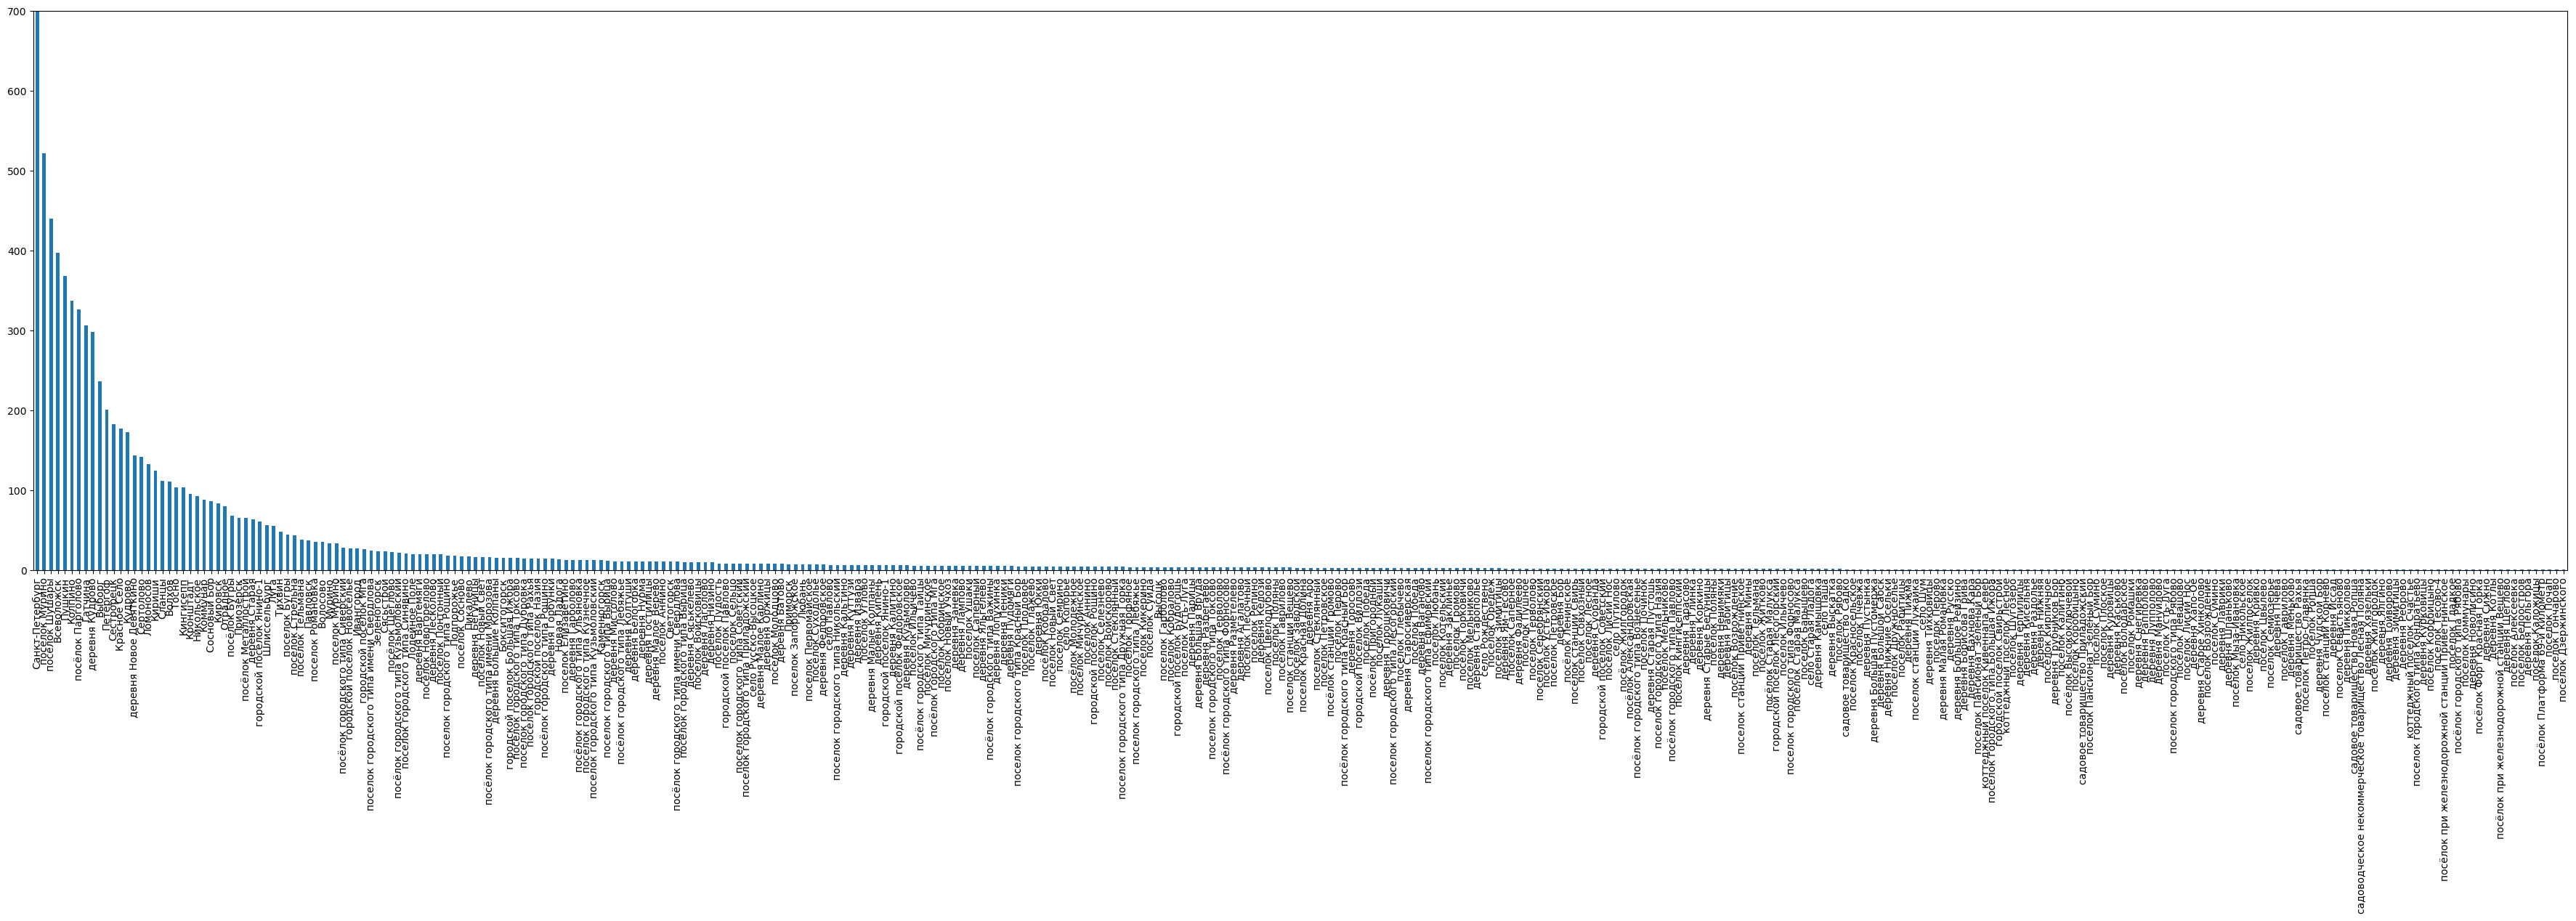

In [18]:

data['locality_name'].value_counts().plot(kind='bar', figsize=(45,10), ylim=(0,700))

There are many cities with a small number of advertisements for apartments for sale. These are probably small towns and villages.

<Axes: >

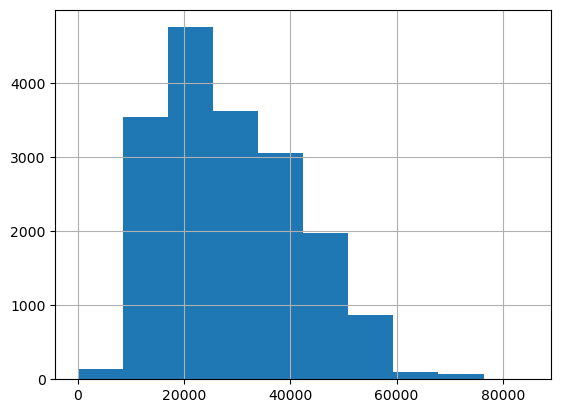

In [19]:
data['airports_nearest'].hist()

There are no negative or extreme values. A reasonable minimum distance must be taken into account.

<Axes: >

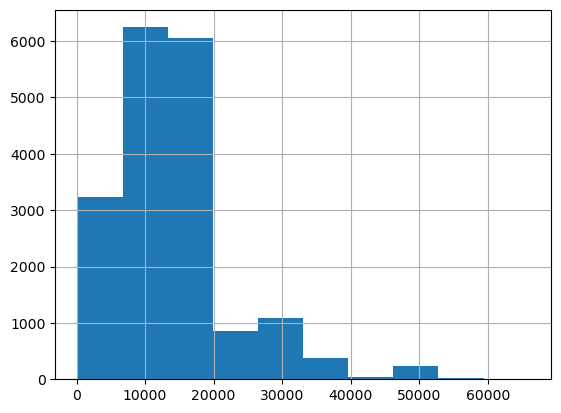

In [20]:
data['cityCenters_nearest'].hist()

There are no negative or extreme values. A reasonable minimum distance must be taken into account. The distribution after 40,000 is a little strange. These are probably outliers.

<Axes: >

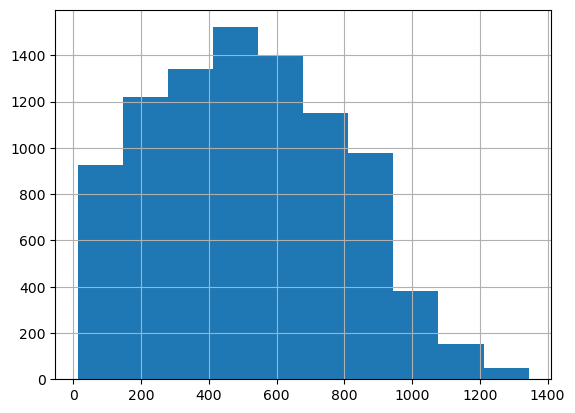

In [21]:
data['ponds_nearest'].hist()

There are no negative or extreme values. A reasonable minimum distance must be taken into account.

<Axes: >

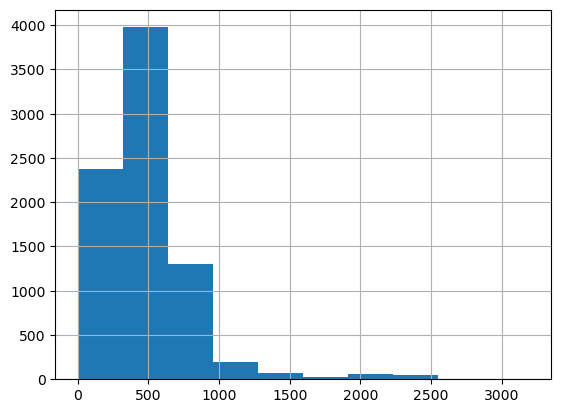

In [22]:
data['parks_nearest'].hist()

There are no negative or extreme values. A reasonable minimum distance must be taken into account.

<Axes: >

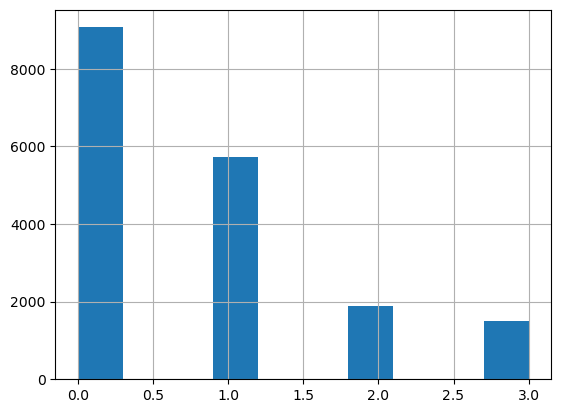

In [23]:
data['ponds_around3000'].hist()

There are no negative or extreme values.

<Axes: >

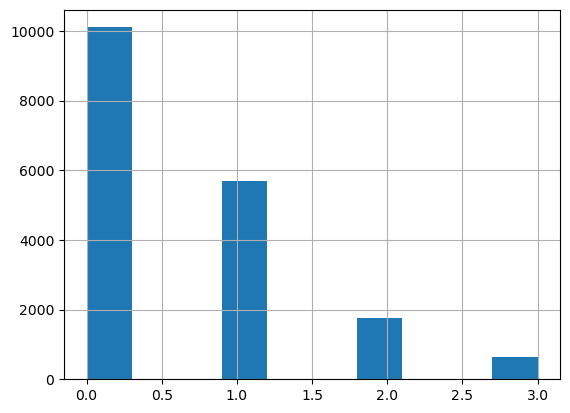

In [24]:
data['parks_around3000'].hist()

There are no negative or extreme values.

<Axes: >

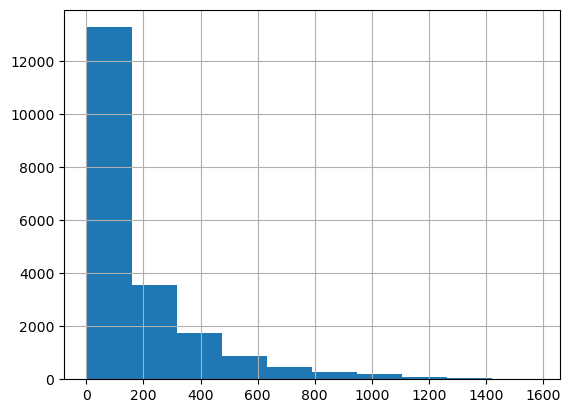

In [25]:
data['days_exposition'].hist()

Everything here seems reasonable. We will need to see how many of them were published in less than 1 day.

**Data summary and formats we need to change:**

- total_images — number of photos of the apartment in the ad ___(int64)___
- last_price — price at the time of removal from publication ___(float64)___
- total_area — apartment area in square meters ___(float64)___
    - It must be changed to **'int'**. The area of apartments is usually indicated in whole numbers, since the meter is already quite an accurate unit of measurement.
    
- first_day_exposition — date of publication ___(object)___
     - We need to change it to the **datetime[ns]** type to be able to work with dates. Now these are just strings.
- rooms — number of rooms ___(int64)___
- ceiling_height — ceiling height (m) ___(float64)___
- floors_total — total floors in the building ___(float64)___
     - We need to change it to **int**. The number of floors cannot be negative or decimal
- living_area — living area in square meters (m²) ___(float64)___
     - It must be changed to **'int'**. The area of apartments is usually indicated in whole numbers, since the meter is already quite an accurate unit of measurement.
- floor — floor number ___(int64)___
- is_apartment — apartment or not ___(object)___
     - Must be **bool** (True or False). Now these are just strings.
- studio — studio apartment or not ___(bool)___
- open_plan — free layout or not ___(bool)___
- kitchen_area — kitchen area in square meters (m²) ___(float64)___
     - It must be changed to **'int'**. The area of apartments is usually indicated in whole numbers, since the meter is already quite an accurate unit of measurement.
- balcony — number of balconies ___(float64)___
     - We need to change it to **int**. The number of balconies cannot be negative or decimal
- locality_name — name of the locality ___(object)___
      
- airports_nearest — distance to the nearest airport in meters (m) ___(float64)___
     - It must be changed to **'int'**. The unit of measurement here is the meter. This is already very precise to indicate distances; decimal numbers are not needed.
- cityCenters_nearest — distance to the city center (m) ___(float64)___
     - It must be changed to **'int'**. The unit of measurement here is the meter. This is already very precise to indicate distances; decimal numbers are not needed.
- parks_nearest — distance to the nearest park (m) ___(float64)___
     - It must be changed to **'int'**. The unit of measurement here is the meter. This is already very precise to indicate distances; decimal numbers are not needed.
- parks_around3000 — number of parks within a 3 km radius ___(float64)___
     - We need to change it to **int**. The number of parks cannot be negative or decimal
- ponds_around3000 — number of ponds within a 3 km radius ___(float64)___
     - We need to change it to **int**. The number of ponds cannot be negative or decimal
- ponds_nearest — distance to the nearest pond (m)___(float64)___
     - It must be changed to **'int'**. The unit of measurement here is the meter. This is already very precise to indicate distances; decimal numbers are not needed.
 - days_exposition — how many days the ad was posted ___(float64)___
      - Implies whole days: change type to **int**

# Data preprocessing

In [26]:
# CHECKING DUPLICATED ROWS IN DATA:
data.duplicated().sum()

0

In [27]:
# CHECKING THE NAN VALUES IN DATA:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

## ceiling_height

In [28]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [29]:
data['ceiling_height'] = data['ceiling_height'].astype('float64')
# Filling the gaps with the average value. The range is no longer so spread out, and the values beyond the third quadrant (75%) are few. 
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].mean())
data['ceiling_height'].isna().sum()

0

<Axes: >

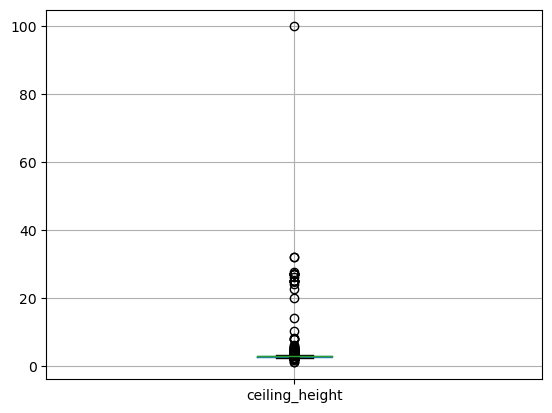

In [30]:
data.boxplot('ceiling_height')

- The value 100 clearly cannot be a ceiling height in an apartment. 100 meters is a fairly tall building. But values between 20 and 40 may make more sense. Let's look at them in more detail on the graph.

<Axes: >

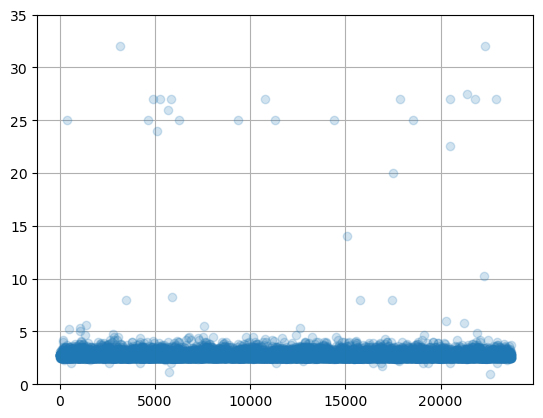

In [31]:
data['ceiling_height'].plot(ylim=(0,35), style='o', grid=True, alpha=0.2)


- Since these values are concentrated between 20 and 35, it is possible that the decimal point/comma was mistakenly omitted or moved to the right. If we move the point to the left one position, we get values that could be estimated heights.


<Axes: >

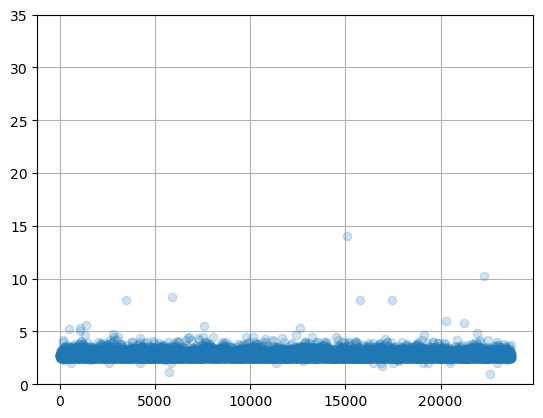

In [32]:
# dividing these values by 10 to turn them into reasonable values for heights
m = (data.ceiling_height >= 20) & (data.ceiling_height <= 35)
data.loc[m, "ceiling_height"] = data.loc[m, "ceiling_height"].div(10)
data['ceiling_height'].plot(ylim=(0,35), style='o', grid=True, alpha=0.2)

<Axes: >

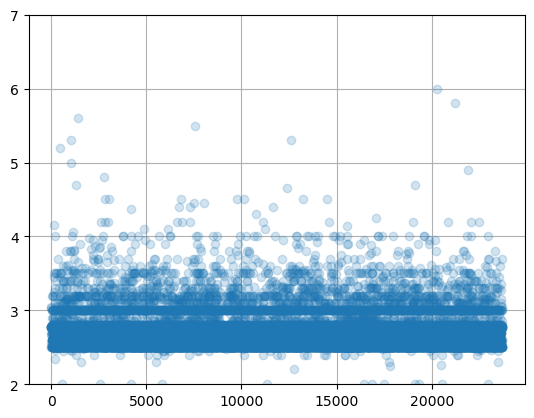

In [33]:
# displaying the graph again to consider the concentration intervals in more detail
data['ceiling_height'].plot(ylim=(2,7), style='o', grid=True, alpha=0.2)

In [34]:
data['ceiling_height'].describe()

count    23699.000000
mean         2.749659
std          0.678168
min          1.000000
25%          2.600000
50%          2.771499
75%          2.771499
max        100.000000
Name: ceiling_height, dtype: float64

- We see that most of the heights are in the range from 2.5 to 5 meters. For this reason, We will take the range of possible heights from 2.5 to 5 meters.

In [35]:
data = data[(data['ceiling_height'] >= 2.50) & (data['ceiling_height'] <= 5)]

## floors_total

In [36]:
data['floors_total'].describe()


count    23523.000000
mean        10.684819
std          6.599784
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [37]:
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].mean())
data['floors_total'] = data['floors_total'].astype('int')
data['floors_total'].isna().sum()

0

In [38]:
data['floors_total'].value_counts()



5     5748
9     3751
16    1372
12    1355
10    1259
4     1198
25    1075
6      910
17     831
3      667
7      590
14     549
18     504
24     469
8      387
2      379
15     364
23     352
19     339
22     286
20     271
13     229
11     202
27     164
21     158
26     124
35      24
1       23
28      21
36       3
34       1
60       1
29       1
33       1
52       1
Name: floors_total, dtype: int64

<Axes: >

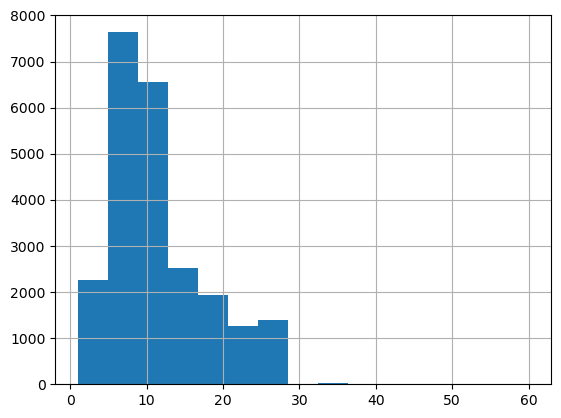

In [39]:
data['floors_total'].hist(bins=15)

In [40]:
data = data.query('floors_total <= 28')
# we'll remove the outliers (there may be buildings with 40,50,60 floors, but we can ignore them, since their number is very small)

In [41]:
data['floors_total'].describe()

count    23577.000000
mean        10.647792
std          6.522296
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         28.000000
Name: floors_total, dtype: float64

## total_area

In [42]:
data['total_area'].describe()

count    23577.000000
mean        60.347271
std         35.572511
min         12.000000
25%         40.000000
50%         52.000000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64

<Axes: >

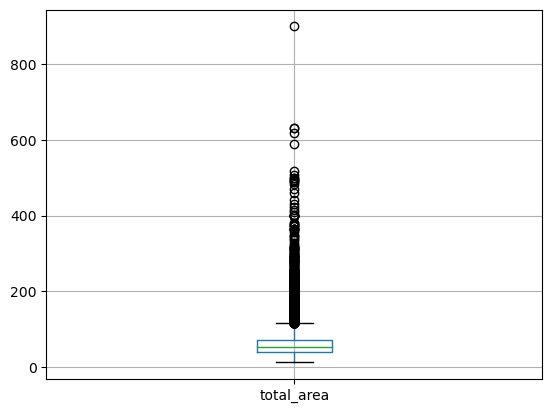

In [43]:
data.boxplot('total_area')

<Axes: >

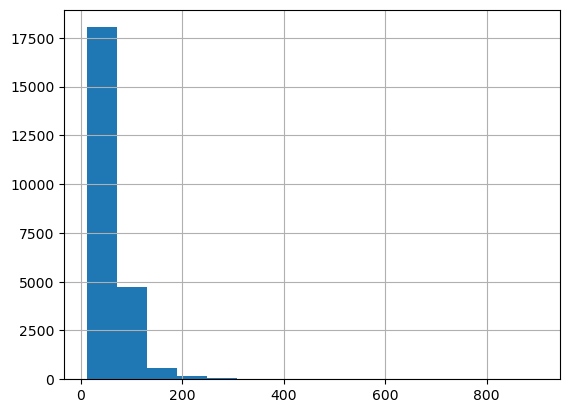

In [44]:
data['total_area'].hist(bins=15)

<Axes: >

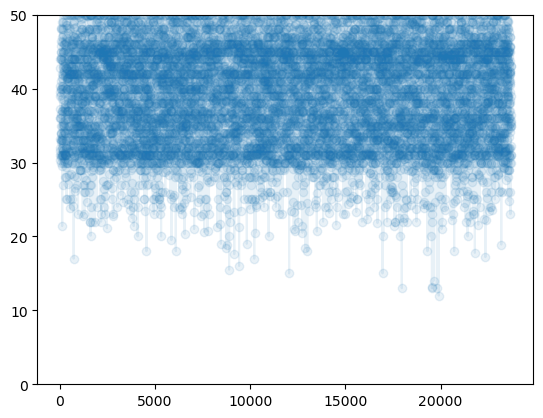

In [45]:
data['total_area'].plot(style=('o-'), alpha=0.1, ylim=(0,50))

<Axes: >

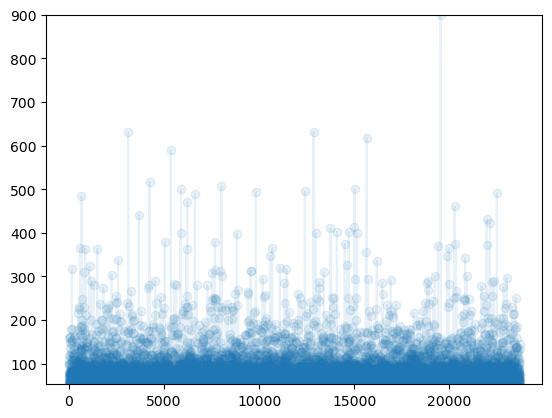

In [46]:
data['total_area'].plot(style=('o-'), alpha=0.1, ylim=(53,900))

In [47]:
data= data.query('total_area >=25 and total_area <= 350')
data['total_area'] = data['total_area'].astype('int')

In [48]:
data['total_area'].describe()

count    23349.000000
mean        59.756135
std         31.374275
min         25.000000
25%         40.000000
50%         52.000000
75%         70.000000
max        347.000000
Name: total_area, dtype: float64

## living_area

In [49]:
data['living_area'].describe()

count    21496.000000
mean        34.311144
std         20.387209
min          2.000000
25%         18.772500
50%         30.000000
75%         42.400000
max        260.000000
Name: living_area, dtype: float64

<Axes: >

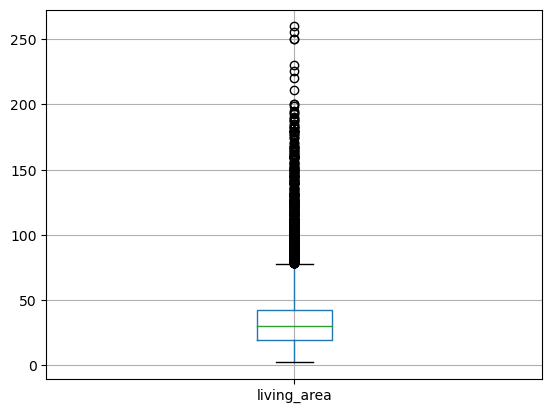

In [50]:
data.boxplot('living_area')

Apparently, a living area larger than 75 square meters is something very rare.

In [51]:
data['living_area'] = data['living_area'].fillna(data['living_area'].median()) # медиана, потуму что большой диапозон расброса 
data['living_area'] = data['living_area'].round().astype('int')
data['living_area'].isna().sum()

0

- Here, we can see that the minimum living area is 2 square meters. It is unlikely that even a room could be so small. Let's see on the graph what value the living area can be calculated from.

<Axes: >

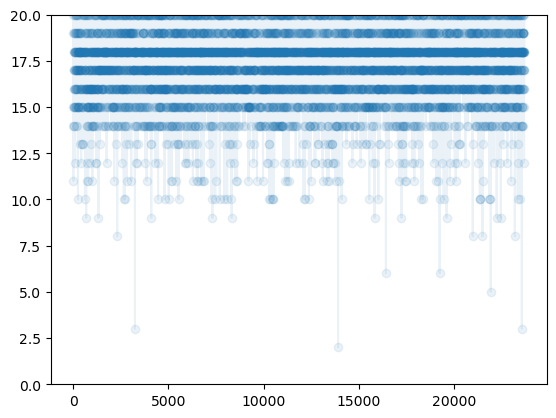

In [52]:
data['living_area'].plot(style='o-', alpha=0.09, ylim=(0,20))


<Axes: >

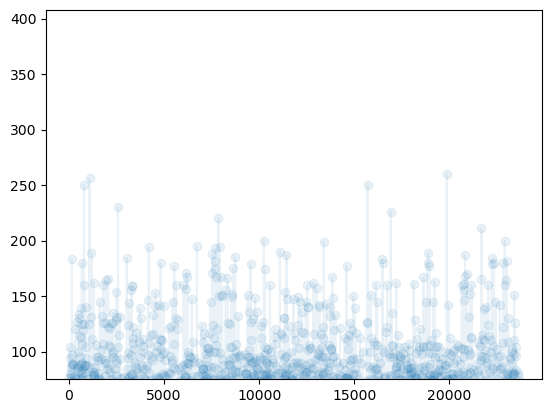

In [53]:
data['living_area'].plot(style='o-', alpha=0.09, ylim=(75,408))

In [54]:
# percentage of living area less than 12.5 square meters and more than 200
print((data['living_area'] < 12.5).sum() / len(data)*100)
print((data['living_area'] > 130).sum() / len(data)*100)

0.6852541864747955
0.6167287678273159


In [55]:
# let's remove from the data everything where the living area is less than 12.5 and more than 200
data = data.query('living_area >= 14 and living_area <= 200')

- There are very few missing values, so we will fill in them with the average value.
- Later on, we will convert the values datatype to integers, since the area is expressed in square meters, which is already quite accurate without decimals. We will do the same with all values that relate to areas.

## is_apartment

In [56]:
data['is_apartment'].value_counts()

False    2670
True       46
Name: is_apartment, dtype: int64

In [57]:
# changinf datatype from 'object' to 'bool' (True or False), filling in the missing values/blanks with "False" for plausibility (there are more of them in the data)
data['is_apartment'] = data['is_apartment'].astype('bool').fillna(False)
data['is_apartment'].isna().sum()

0

## kitchen_area

In [58]:
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())
data['kitchen_area'] = data['kitchen_area'].round().astype('int')
data['kitchen_area'].isna().sum()

0

In [59]:
data['kitchen_area'].describe()

count    23111.000000
mean        10.336982
std          5.439195
min          1.000000
25%          7.000000
50%          9.000000
75%         11.000000
max        107.000000
Name: kitchen_area, dtype: float64

<Axes: >

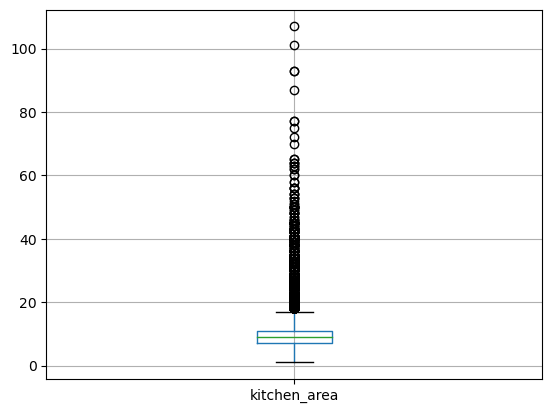

In [60]:
data.boxplot('kitchen_area')

Apparently, a kitchen larger than 20 square meters is something very rare.

<Axes: >

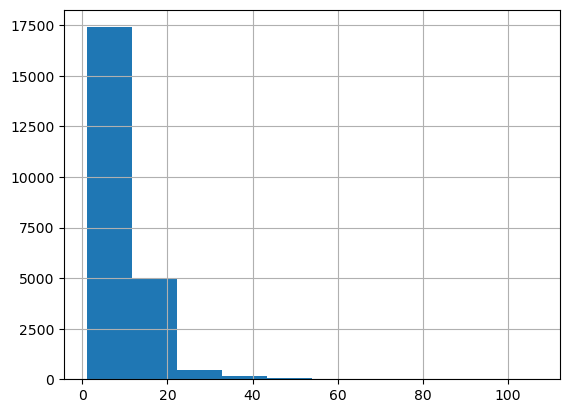

In [61]:
data['kitchen_area'].hist()

<Axes: >

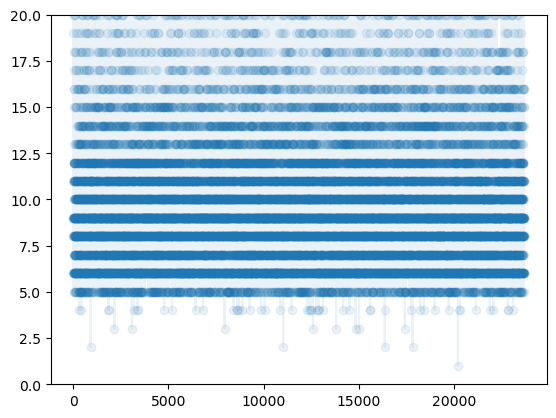

In [62]:
data['kitchen_area'].plot(style='o-', alpha=0.09, ylim=(0,20))

In [63]:
# percentage of kitchen area less than 5 square meters
(data['kitchen_area'] <5).sum() / len(data) * 100

0.259616632772273

In [64]:
# percentage of kitchen area more than 20 square meters
(data['kitchen_area'] >20).sum() / len(data) * 100

4.032711695729306

<Axes: >

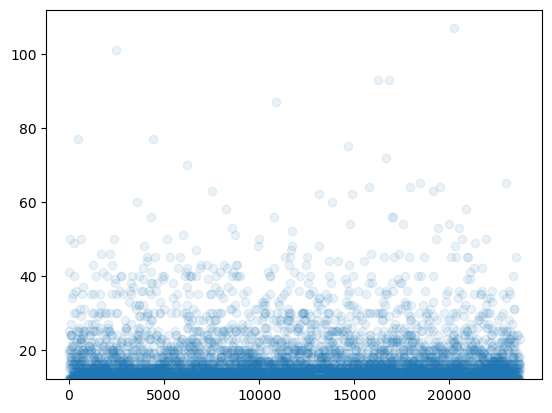

In [65]:
# same process but regarding strangely high numbers
data['kitchen_area'].plot(style='o', alpha=0.09, ylim=(12,112))

In [66]:
(data['kitchen_area'] > 60).sum() / len(data) * 100

0.08221193371121976

In [67]:
# removing everything where the kitchen area is less than 5 and more than 25 from the data 
data = data.query('kitchen_area >= 5 & kitchen_area <= 25')

## floor

In [68]:
data['floor'].describe()

count    22550.000000
mean         5.853925
std          4.835669
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         27.000000
Name: floor, dtype: float64

<Axes: >

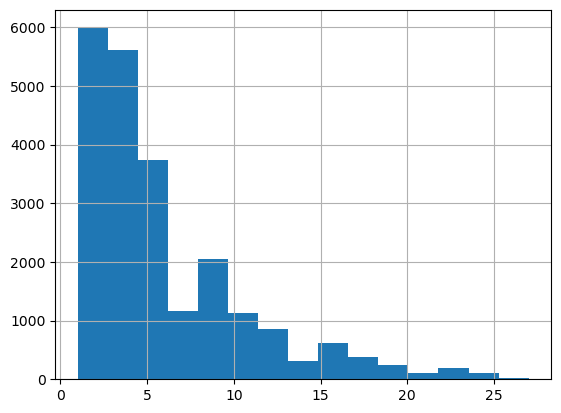

In [69]:
data['floor'].hist(bins=15)

- The floor number does not exceed the total number of floors in the building and is not less than 0. There are no decimal values. Everything is fine here

## balcony

<Axes: >

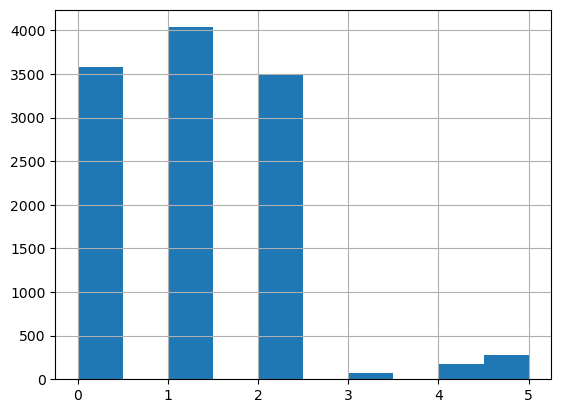

In [70]:
data['balcony'].hist()

In [71]:
# Making sure there are no decimal numbers
data['balcony'].value_counts()

1.0    4035
0.0    3579
2.0    3488
5.0     284
4.0     175
3.0      71
Name: balcony, dtype: int64

- If there is a missing value/blank in this column, then it is logical to assume that there is no balcony. Gaps must be filled in with zeros.
- Also, balconies cannot be a decimal number. This is either a balcony or two, but not one and a half. That's why we'll change the datatype from float to int.

In [72]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype('int')

In [73]:
data['balcony'].describe()

count    22550.000000
mean         0.591752
std          0.956494
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: balcony, dtype: float64

## locality_name

In [74]:
data['locality_name'].describe()

count               22505
unique                361
top       Санкт-Петербург
freq                14901
Name: locality_name, dtype: object

In [75]:
data['locality_name'].value_counts()

Санкт-Петербург                    14901
посёлок Мурино                       477
посёлок Шушары                       420
Всеволожск                           384
Пушкин                               348
                                   ...  
посёлок Белоостров                     1
деревня Пельгора                       1
поселок Каложицы                       1
посёлок Платформа 69-й километр        1
посёлок Дзержинского                   1
Name: locality_name, Length: 361, dtype: int64

In [76]:
# finding out if data['locality_name'] has "None" or "Null" or '-' in the form str
((data['locality_name'] == 'None') | (data['locality_name'] == '-') | (data['locality_name'] == 'Null')).sum()

0

In [77]:
# converting all letters into lowercase to avoid duplicates
data['locality_name'] = data['locality_name'].str.lower()
# checking for duplicates
data['locality_name'].unique()

array(['санкт-петербург', 'посёлок шушары', 'городской посёлок янино-1',
       'посёлок мурино', 'ломоносов', 'сертолово', 'петергоф', 'пушкин',
       'посёлок парголово', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина', 'поселок мурино',
       'деревня фёдоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'посёлок металлострой',
       'посёлок городского типа лебяжье',
       'посёлок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'посёлок аннино',
       'поселок городского типа ефимовский', 'посёлок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'посёлок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'сланцы', 'село путилово', 'ивангород',
    

In [78]:
# remoulding the duplicates
data['locality_name'] = data['locality_name'].replace('ё', 'е')
# filling in the gaps with the word 'Другие' ('Others')
data['locality_name'] = data['locality_name'].fillna('Другие')
data['locality_name'].isna().sum()

0

## days_exposition

In [79]:
data['days_exposition'] = data['days_exposition'].fillna(data['days_exposition'].median())
data['days_exposition'] = data['days_exposition'].astype('int')
(data['days_exposition'] < 1).sum()

0

## first_day_expostion

In [80]:
# changing the date to the datetime format
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format= "%Y-%m-%d")

## rooms

In [81]:
data['rooms'].describe()

count    22550.000000
mean         2.058448
std          1.023797
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         16.000000
Name: rooms, dtype: float64

<Axes: >

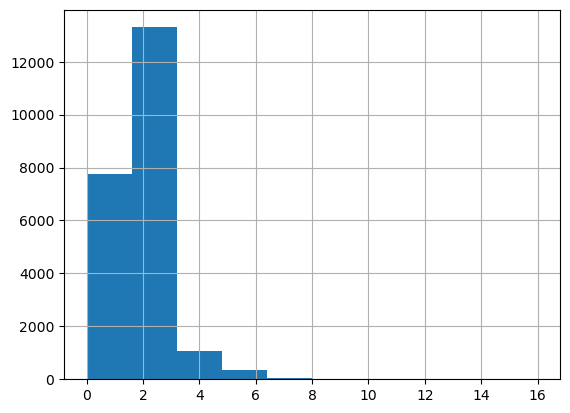

In [82]:
data['rooms'].hist()

<Axes: xlabel='living_area'>

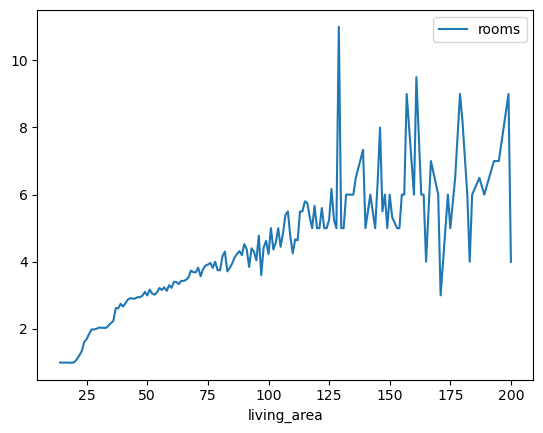

In [83]:
data.pivot_table(index='living_area', values='rooms').plot()

In [84]:
# removing outliers where there are more than 10 rooms
data = data.query('rooms <=10')

In [85]:
len(data['locality_name'].unique())

362

## last_price

In [86]:

data['last_price'].describe()

count    2.254700e+04
mean     5.956514e+06
std      5.772536e+06
min      4.300000e+05
25%      3.450000e+06
50%      4.600000e+06
75%      6.600000e+06
max      1.599840e+08
Name: last_price, dtype: float64

<Axes: >

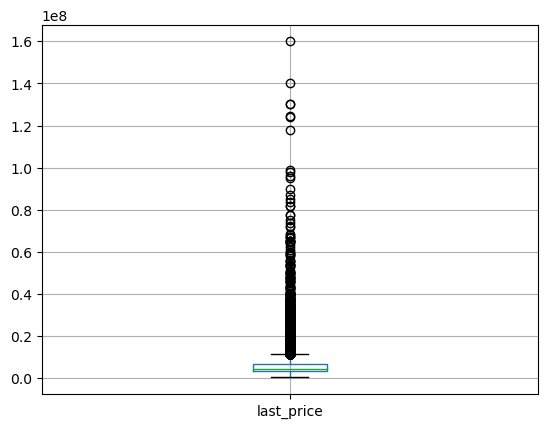

In [87]:
data.boxplot('last_price')

<Axes: >

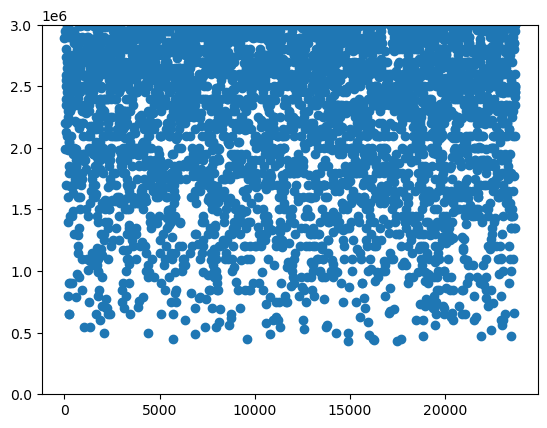

In [88]:
data['last_price'].plot(style='o', ylim=(0,3000000))

<Axes: >

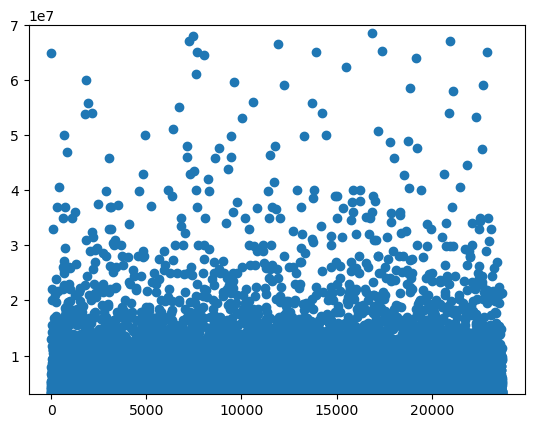

In [89]:
data['last_price'].plot(style='o', ylim=(3000000,70000000))

<Axes: >

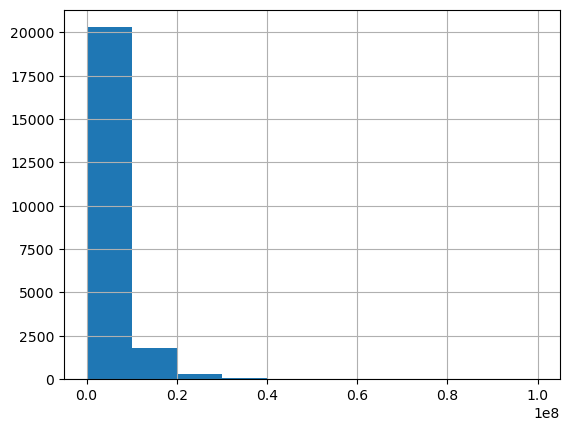

In [90]:
data['last_price'].hist(range=(10000, 100000000))

In [91]:
# leaving in the data apartments with a price less than or equal to 50 million.
# Above this price, there are, probably, super rare luxury apartments
data = data.query('last_price <=50000000')


## Let's have a look at the percentage of missing data received automatically

In [92]:
print(data['cityCenters_nearest'].isna().sum() / len(data) * 100)
print(data['airports_nearest'].isna().sum() / len(data) * 100)
print(data['parks_around3000'].isna().sum() / len(data) * 100)
print(data['ponds_around3000'].isna().sum() / len(data) * 100)
print(data['parks_nearest'].isna().sum() / len(data) * 100)
print(data['ponds_nearest'].isna().sum() / len(data) * 100)

23.510581540103146
23.60394807042504
23.506135514849724
23.506135514849724
66.49475369020095
62.288813800462385


- For the 'cityCenters_nearest', 'airports_nearest', 'parks_around3000' and 'ponds_around3000' columns, missing values account for 23% of the total. This means we have 77% of the values, which should be enough to get a reliable mean or median to fill in the gaps with.

- Since the values ​​should not diverge extremely in each city, for greater accuracy and reliability, we can fill in the gaps with the average/median value for the city. But on the other hand, if there are cities in which data was not provided for any apartment, the average/median cannot be calculated. Because of this, it is better to leave this data as it is.

- On the other hand, in the 'parks_nearest' and 'ponds_nearest' columns, gaps account for 66% and 62% of the total, respectively. It is best to leave them as is, as there is not enough data to produce a reliable mean/median.
    
    

- Also, we will not cut out outliers due to data shortage, unless they are values that contradict logic.

## airports_nearest

In [93]:
# rounding up and converting into int
data['airports_nearest'] = data.loc[data['airports_nearest'].notna(), \
                                          'airports_nearest'].round().astype('int')

In [94]:
data['airports_nearest'].describe()

count    17183.000000
mean     28804.464994
std      12694.394678
min          0.000000
25%      18442.500000
50%      26785.000000
75%      37407.000000
max      84869.000000
Name: airports_nearest, dtype: float64

<Axes: >

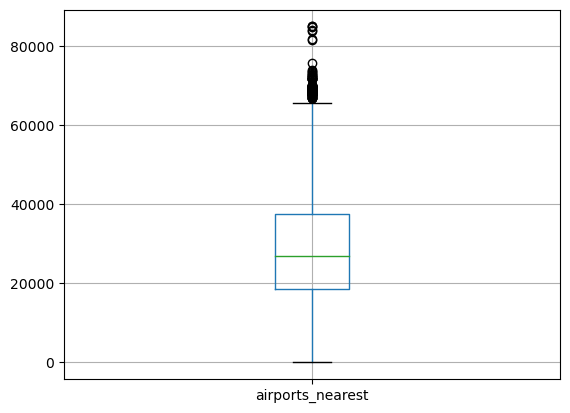

In [95]:
data.boxplot('airports_nearest')

<Axes: >

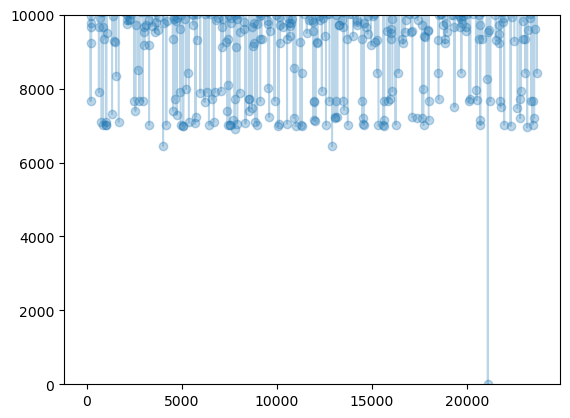

In [96]:
data['airports_nearest'].plot(style='o-', alpha=0.3, ylim= (0,10000))

In [97]:
# How many apartments with a distance of less than 6500 meters to the airport
print((data['airports_nearest'] <=6500).sum())
# How many apartments with a distance of more than 65,000 meters to the airport
print((data['airports_nearest'] >=65000).sum())

3
113


The mean and median are almost equal. We can remove values beyond Q3 + 1.5 * IQR (65000, more or less). But overall, the data seems well distributed.

## cityCenters_nearest

In [98]:
# rounding up and converting into int
data['cityCenters_nearest'] = data.loc[data['cityCenters_nearest'].notna(), \
                                          'cityCenters_nearest'].round().astype('int')

In [99]:
data['cityCenters_nearest'].describe()

count    17204.000000
mean     14343.529935
std       8572.678183
min        181.000000
25%       9594.000000
50%      13198.000000
75%      16333.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

<Axes: >

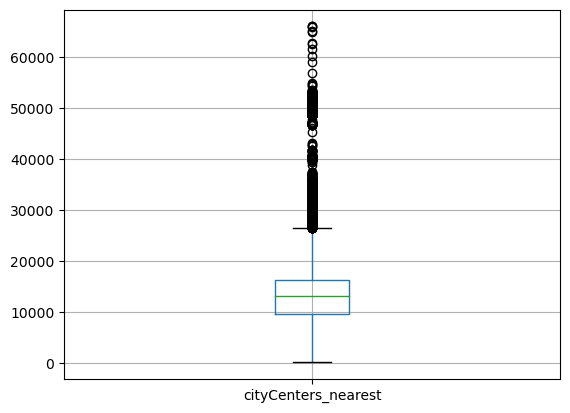

In [100]:
data.boxplot('cityCenters_nearest')

Here, we could remove values outside of Q3+1.5*IQR (26.642). After all, for example, in St. Petersburg, which is the largest city of all, the distance from the most peripheral point to the center is about 33 kilometers. And if the apartment is located in the forest, it is doubtful that those who live there will have to travel more than 30 km and back to stock up from time to time.

<Axes: >

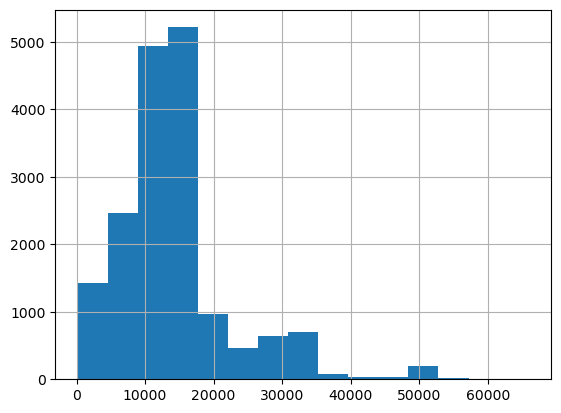

In [101]:
data['cityCenters_nearest'].hist(bins=15)

In [102]:
#data = data.query('cityCenters_nearest <=35000')

## parks_around3000

In [103]:
data['parks_around3000'].describe()

count    17205.000000
mean         0.595466
std          0.788653
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64

<Axes: >

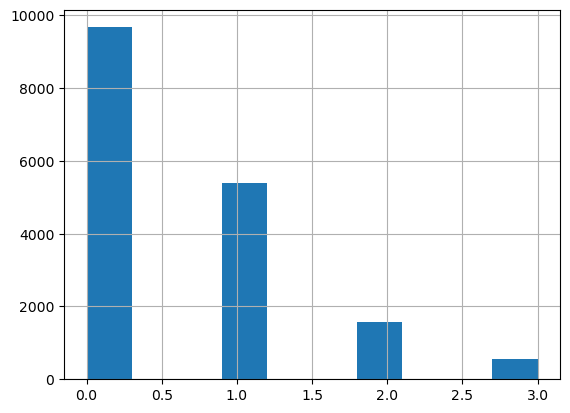

In [104]:
data['parks_around3000'].hist()

There are no strange values. The more parks there are, the fewer apartments with that many parks nearby.

In [105]:
len(data['locality_name'].unique())

362

## parks_nearest

Here, we'll simply visualize the data to get an overview. Since more than 60% of the values are missing, we cannot say that these statistics can be considered reliable and will not make any changes.

In [106]:
data['parks_nearest'].describe()

count    7536.000000
mean      492.936704
std       339.869708
min         1.000000
25%       290.000000
50%       456.000000
75%       614.000000
max      3190.000000
Name: parks_nearest, dtype: float64

<Axes: >

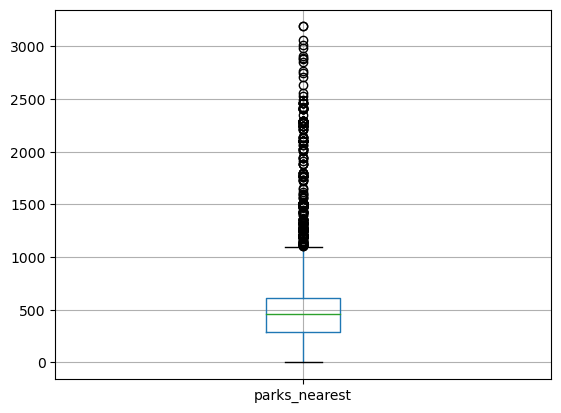

In [107]:
data.boxplot('parks_nearest')

It can be seen that the missing values/blanks are located after the theshold of 1100 meters. It is also difficult to believe that the nearest park is only 1 meter away.

<Axes: >

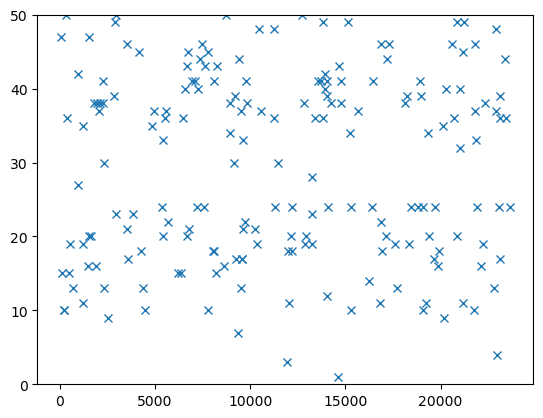

In [108]:
data['parks_nearest'].plot(style='x', ylim=(0,50))

<Axes: >

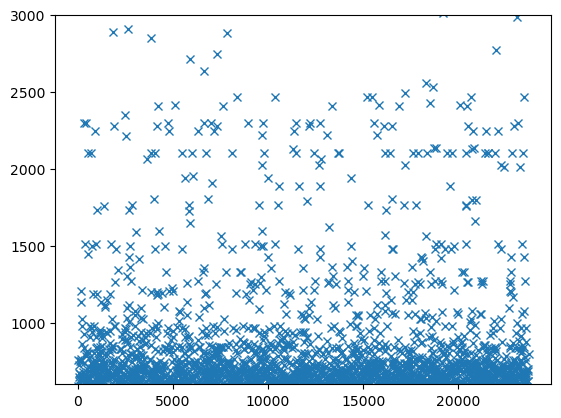

In [109]:
data['parks_nearest'].plot(style='x', ylim=(600,3000))

<Axes: >

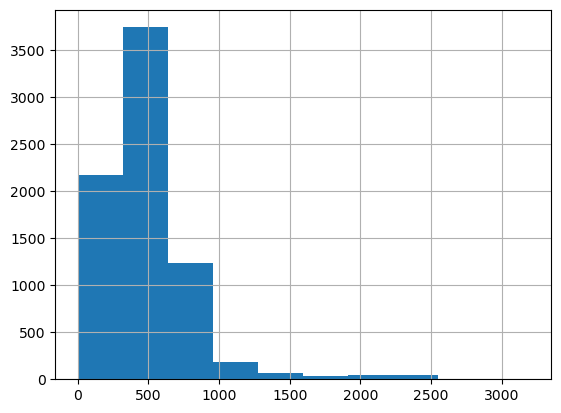

In [110]:
data['parks_nearest'].hist()

In [111]:
print((data['parks_nearest'] < 10).sum())
print((data['parks_nearest'] >= 1150).sum())

6
277


We could remove apartments with parks that are less than 10 meters near and more than 1150 away, but, on the one hand, those with parks that are less than 10 meters close are insignificant for statistics, and on the other hand, the sample is too small to correctly select the cutting threshold above.

In [112]:
len(data['locality_name'].unique())

362

## ponds_around3000

In [113]:
data['ponds_around3000'].describe()

count    17205.000000
mean         0.748503
std          0.923447
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: ponds_around3000, dtype: float64

<Axes: >

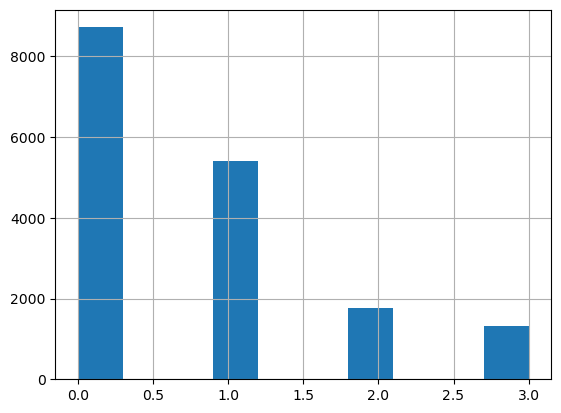

In [114]:
data['ponds_around3000'].hist()

There are no strange values. The more ponds there are around, the fewer apartments with so many ponds nearby.

## ponds_nearest

Here, we'll simply visualize the data to get an overview. Since more than 60% of the values are missing, we cannot say that these statistics can be considered reliable and will not make any changes.

In [115]:
data['ponds_nearest'].describe()

count    8482.000000
mean      524.637114
std       276.667005
min        13.000000
25%       303.000000
50%       510.000000
75%       733.750000
max      1344.000000
Name: ponds_nearest, dtype: float64

<Axes: >

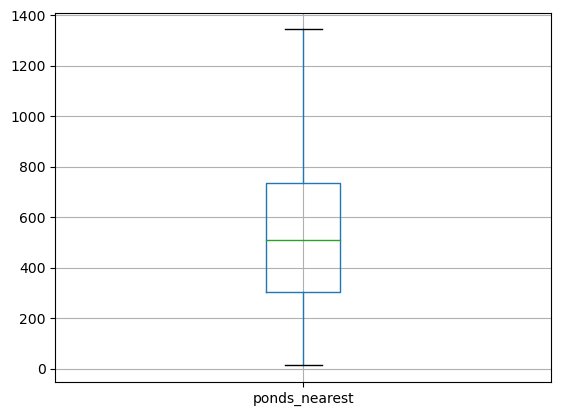

In [116]:
data.boxplot('ponds_nearest')

<Axes: >

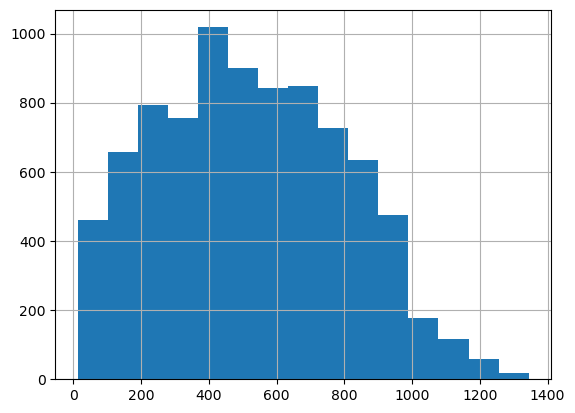

In [117]:
data['ponds_nearest'].hist(bins=15)

<Axes: >

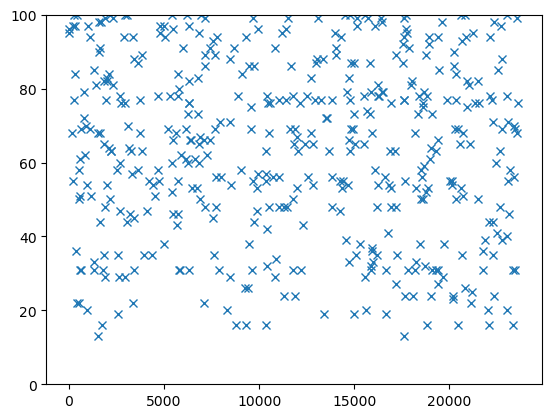

In [118]:
data['ponds_nearest'].plot(style='x', ylim=(0,100))

<Axes: >

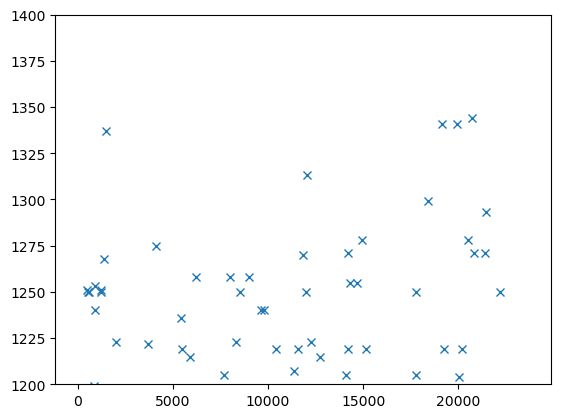

In [119]:
data['ponds_nearest'].plot(style='x', ylim=(1200,1400))

Everything is nice here. The few values that exist are evenly distributed.

## Checking that info is ok now:

In [120]:
# checking that the data type is changed everywhere and there are no gaps
data.info()
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22492 entries, 0 to 23697
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22492 non-null  int64         
 1   last_price            22492 non-null  float64       
 2   total_area            22492 non-null  int32         
 3   first_day_exposition  22492 non-null  datetime64[ns]
 4   rooms                 22492 non-null  int64         
 5   ceiling_height        22492 non-null  float64       
 6   floors_total          22492 non-null  int32         
 7   living_area           22492 non-null  int32         
 8   floor                 22492 non-null  int64         
 9   is_apartment          22492 non-null  bool          
 10  studio                22492 non-null  bool          
 11  open_plan             22492 non-null  bool          
 12  kitchen_area          22492 non-null  int32         
 13  balcony         

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5309
cityCenters_nearest      5288
parks_around3000         5287
parks_nearest           14956
ponds_around3000         5287
ponds_nearest           14010
days_exposition             0
dtype: int64

## The total area of the house cannot be less than the sum of the living area and the kitchen area. It is also unlikely that the kitchen takes up more than half the area of the apartment. So let's delete data that does not meet these conditions.

In [121]:
data = data[((data['kitchen_area'] + data['living_area']) <= data['total_area']) & (data['kitchen_area'] \
                                                                                          <= data['total_area'] /2)]

# Let's add some new columns that may be useful

In [122]:
data['price_per_sqm'] = data['last_price'] / data['total_area'] 
data['exposition_weekday'] = data['first_day_exposition'].dt.weekday
data['exposition_month'] = data['first_day_exposition'].dt.month
data['exposition_year'] = data['first_day_exposition'].dt.year

def which_floor(x):
    max_floor = x['floors_total']
    the_floor= x['floor']
    if max_floor == the_floor:
        x['floor_type'] = 'last'
        return x
    elif the_floor == 1:
        x['floor_type'] = 'first'
        return x
    else:
        x['floor_type'] = 'other'
        return x
    
data = data.apply(which_floor, axis=1)

data['cityCenters_nearest_KM'] = data.loc[data['cityCenters_nearest'].notna(), 'cityCenters_nearest'].div(1000)

data['cityCenters_nearest_KM'] = data.loc[data['cityCenters_nearest_KM'].notna(), \
                                          'cityCenters_nearest_KM'].round().astype('int')

## price_per_sqm

In [123]:
data['price_per_sqm'].describe()

count     21939.000000
mean      96766.362064
std       37659.639665
min        7962.962963
25%       76094.325718
50%       94444.444444
75%      113063.492063
max      725454.545455
Name: price_per_sqm, dtype: float64

<Axes: >

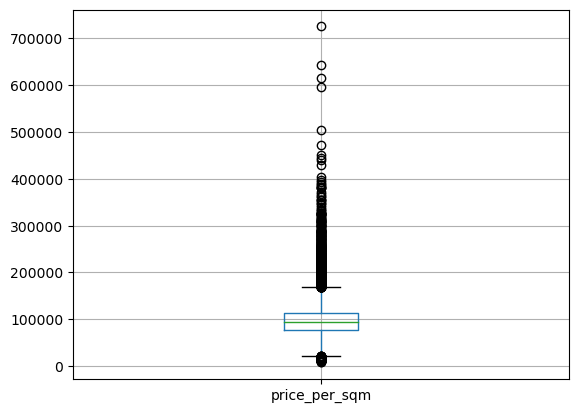

In [124]:
data.boxplot('price_per_sqm')

<Axes: >

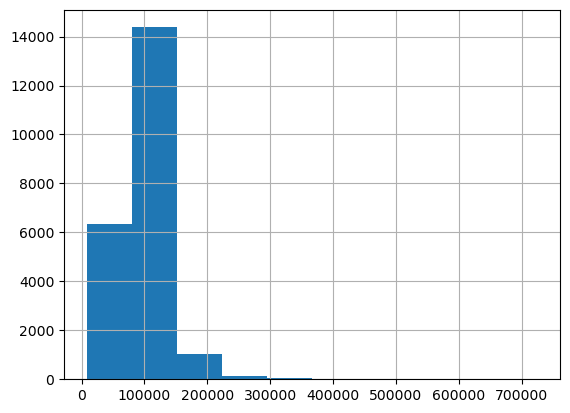

In [125]:
data['price_per_sqm'].hist()

In [126]:
# Filtering the data. Removing data outside Q3 + 1.5 * IQR
data = data.query('price_per_sqm < 200000')

In [127]:
# checking price per square meters stats

data['price_per_sqm'].describe()

count     21611.000000
mean      94304.821242
std       31010.332215
min        7962.962963
25%       75721.220527
50%       93939.393939
75%      112000.000000
max      199999.397849
Name: price_per_sqm, dtype: float64

# Let's examine how quickly the apartments were sold

<Axes: xlabel='exposition_year'>

<Figure size 1000x1000 with 0 Axes>

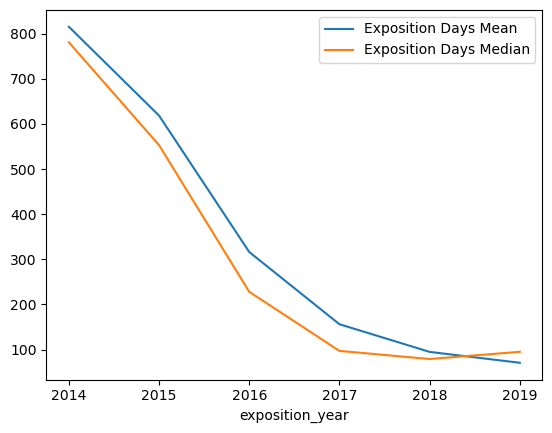

In [128]:
plt.figure(figsize=(10,10))
mean_median_days_exposed = data.pivot_table(index='exposition_year', values='days_exposition', aggfunc=['mean', 'median'])
mean_median_days_exposed.columns = mean_median_days_exposed.columns.droplevel(0)
mean_median_days_exposed.columns = ['Exposition Days Mean', 'Exposition Days Median']
mean_median_days_exposed.plot()

count    21611.000000
mean       169.099348
std        205.344458
min          1.000000
25%         46.000000
50%         95.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

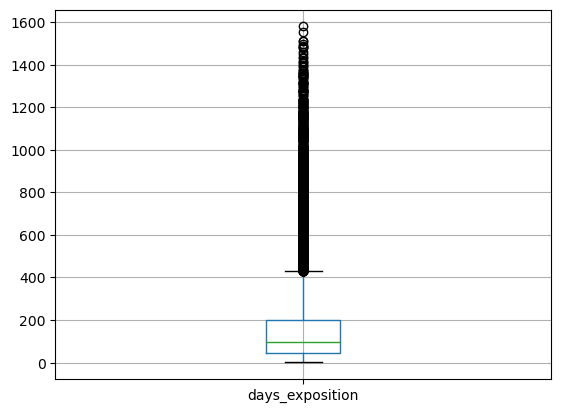

In [129]:
data.boxplot('days_exposition')
data['days_exposition'].describe()

<Axes: ylabel='Frequency'>

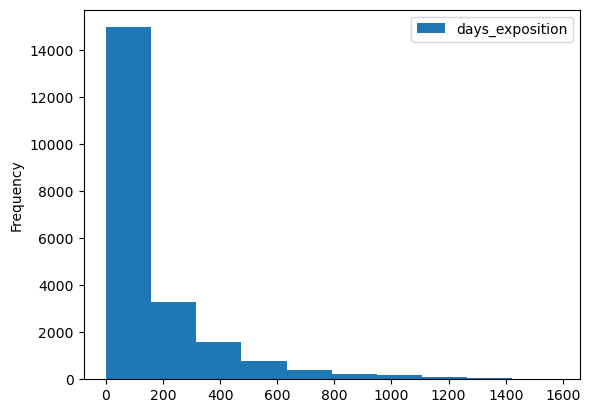

In [130]:
data['days_exposition'].plot(kind='hist', legend=True )

<Axes: >

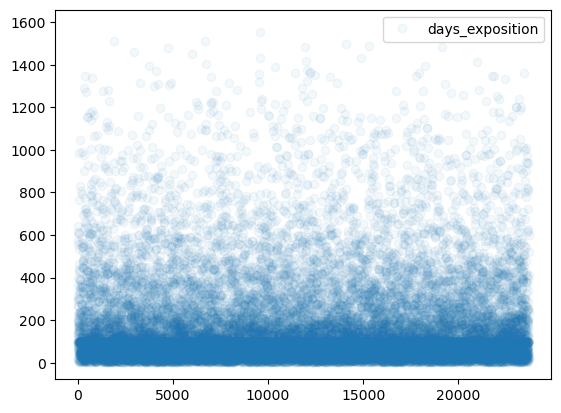

In [131]:
data['days_exposition'].plot(style='o', legend=True ,  alpha=0.05)

<Axes: >

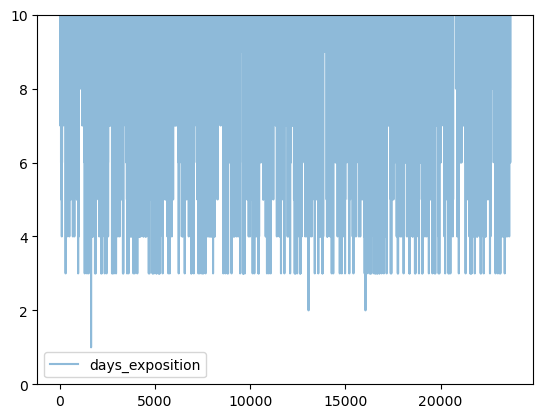

In [132]:
data['days_exposition'].plot(style='-', legend=True ,  alpha=0.5, ylim= (0,10))

In [133]:
# percentage of too slow and too fast sales respectively
sales_too_slow = data[data['days_exposition'] >420]
sales_too_fast = data[data['days_exposition'] <3]
print(len(sales_too_slow['days_exposition']) / len(data) *100)
print(len(sales_too_fast['days_exposition']) / len(data) *100)


10.152237286567026
0.013881819443801768


- Note that the average sales speed has been increasing over the years.

- In order to set the bar which we will say that sales are very slow from, we observe which average value the density starts to decrease from on the graph. In this case, it is approximately 420, beyond the limit of Q3+1.5*IQR.

- We do the same with the bottom of the graph. There are free values below 3 days. We perceive this area as abnormally fast sales.

- The share of abnormally slow sales from the total is 10.15%.
- The share of abnormally fast sales from the total is 0.01%
- Most values are located to the right of the median. To determine the usual sales time, let's take the average value of 169 days.

# Let's check what factors influence the most the total price of an object

In [134]:
# checking the correlations among the features
data_x = data.loc[:,['last_price','total_area','living_area','kitchen_area','rooms']]
data_x.corr()

last_price  total_area  living_area  kitchen_area     rooms
last_price      1.000000    0.817729     0.681768      0.533615  0.540826
total_area      0.817729    1.000000     0.889878      0.507323  0.796250
living_area     0.681768    0.889878     1.000000      0.335442  0.850426
kitchen_area    0.533615    0.507323     0.335442      1.000000  0.178737
rooms           0.540826    0.796250     0.850426      0.178737  1.000000

From this table of correlations we can conclude that the factors that most influence the price of housing are the following, classified from most influential to least influential:

The greater the more expensive

- 1 Total area
- 2 Living Area
- 3 Number of Rooms
- 4 Kitchen Area

Text(0.5, 1.0, 'Price Fluctuations')

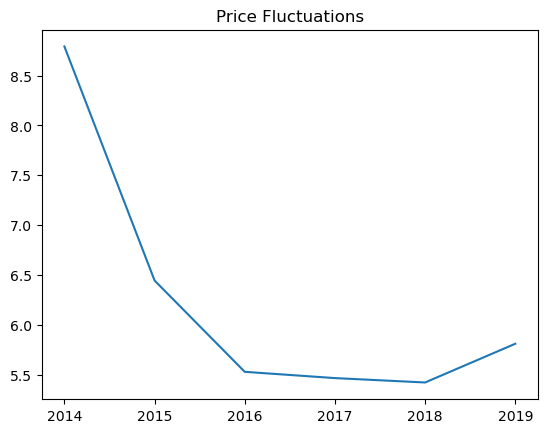

In [135]:
# checkиing if it’s true that the price is getting lower over the years
p_price = data
p_price['price_mill'] = p_price['last_price'].div(1000000)
price_change = p_price.pivot_table(index='exposition_year', values='price_mill')
plt.plot(price_change)
plt.title('Price Fluctuations')


- From 2014 to 2016, the prices fell sharply from about 9 million to just over five and a half million. After 2016, the prices continue to fall, but not very significantly. After 2018, they begin to grow again at the same rhythm without significant volatility. In the periods from 2016 to 2019, prices remain in the range of 5.5-6 million.

<Axes: >

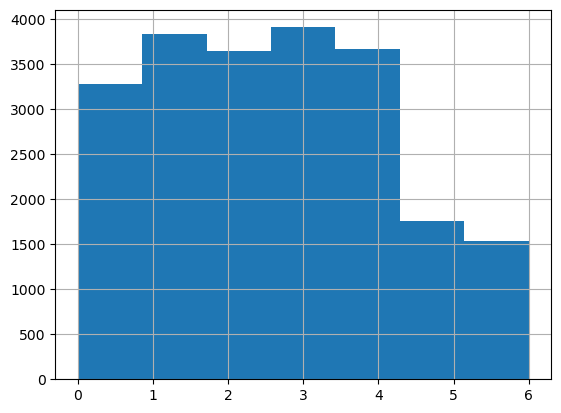

In [136]:
data['exposition_weekday'].hist(bins=7)

- The least number of publications occur on Saturday and Sunday.

Text(0.5, 1.0, 'Day of Publication')

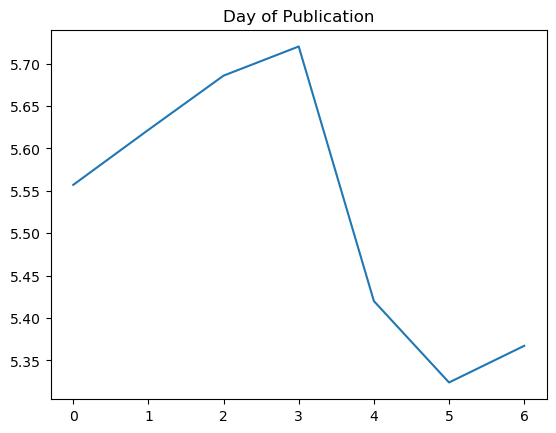

In [137]:
price_change = p_price.pivot_table(index='exposition_weekday', values='price_mill')
plt.plot(price_change)
plt.title('Day of Publication')


- Apparently, more expensive apartments are published on Thursdays. From Thursday to Saturday, prices drop sharply. The cheapest apartments are published on Saturday. Prices then rise progressively until Thursday.

<Axes: >

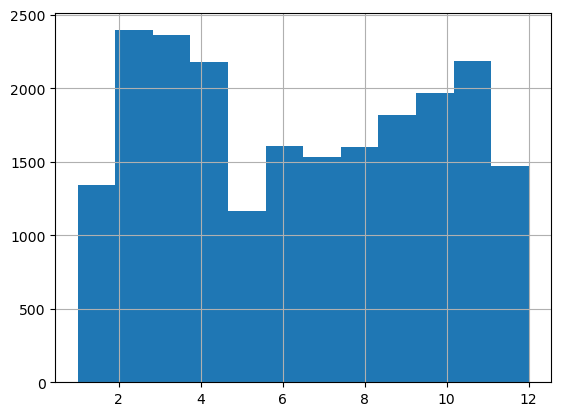

In [138]:
data['exposition_month'].hist(bins=12)

- The graph shows the number of apartments published for each month.

Text(0.5, 1.0, 'Month of Publication')

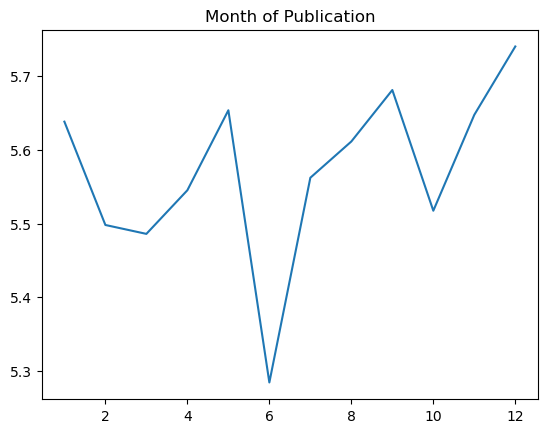

In [139]:
price_change = p_price.pivot_table(index='exposition_month', values='price_mill')
plt.plot(price_change)
plt.title('Month of Publication')


- Prices begin to rise from October to January, where they reach their maximum. They then decline and change throughout the year. The cheapest apartments on average are published in June.

Text(0.5, 1.0, 'Rooms')

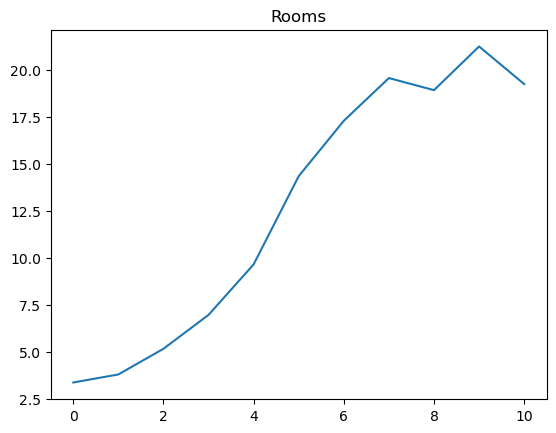

In [140]:
price_change = p_price.pivot_table(index='rooms', values='price_mill')
plt.plot(price_change)
plt.title('Rooms')

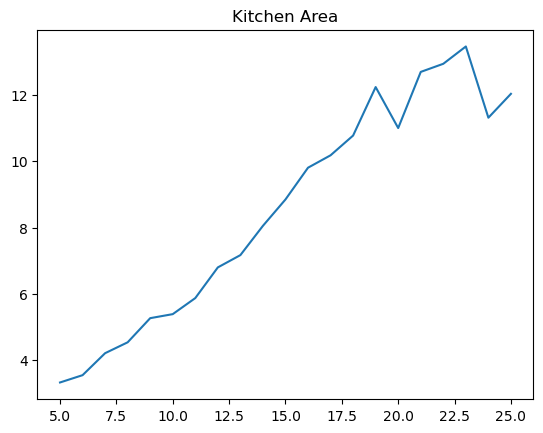

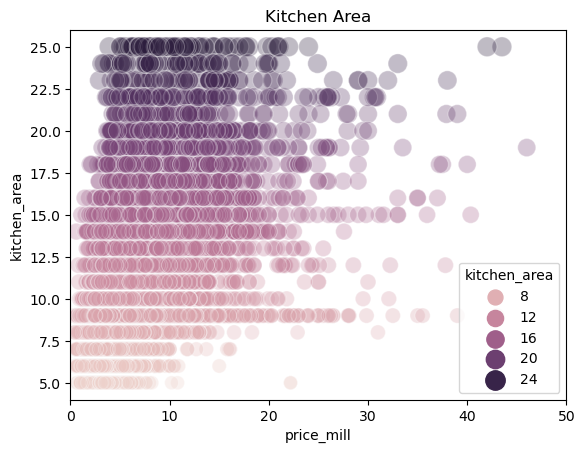

In [141]:
price_change = p_price.pivot_table(index='kitchen_area', values='price_mill')
plt.plot(price_change)
plt.title('Kitchen Area')
plt.show()

sns.scatterplot(x='price_mill', y='kitchen_area',
                     hue='kitchen_area', size='kitchen_area',
                     data=p_price,sizes=(100, 200), alpha=0.3)

plt.xlim(0,50)
plt.title('Kitchen Area')
plt.show()

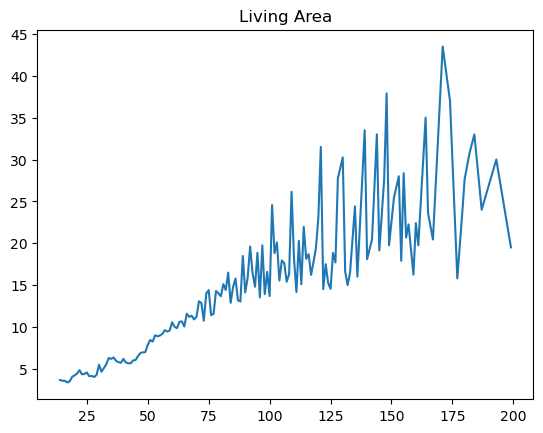

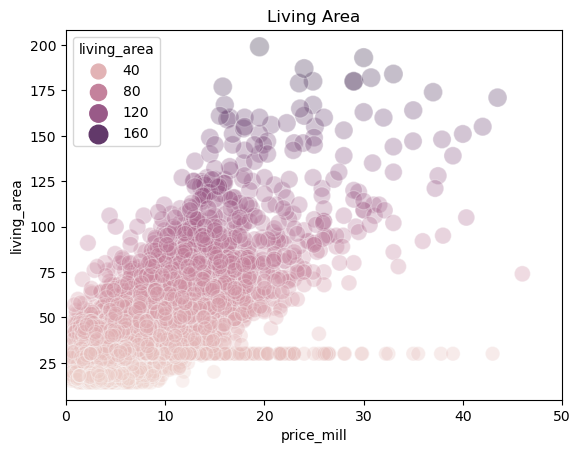

In [142]:
price_change = p_price.pivot_table(index='living_area', values='price_mill')

plt.plot(price_change)
plt.title('Living Area')

plt.show()

sns.scatterplot(x='price_mill', y='living_area',
                     hue='living_area', size='living_area',
                     data=p_price,sizes=(100, 200), alpha=0.3)

plt.xlim(0,50)
plt.title('Living Area')
plt.show()

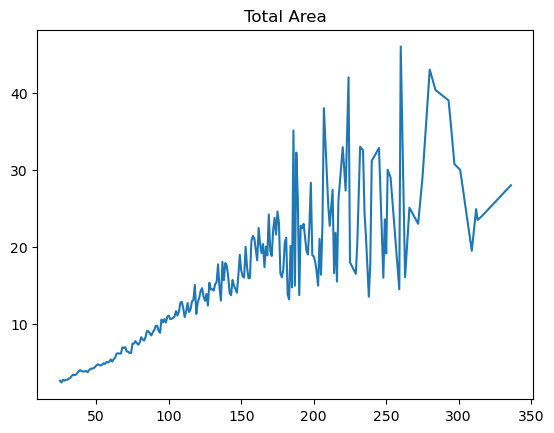

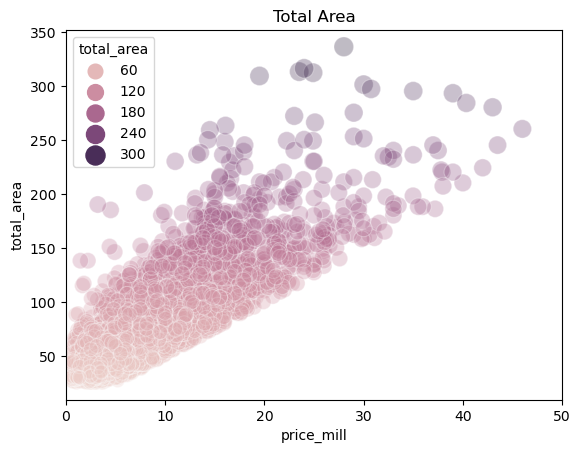

In [143]:
price_change = p_price.pivot_table(index='total_area', values='price_mill')
plt.plot(price_change)
plt.title('Total Area')
plt.show()

sns.scatterplot(x='price_mill', y='total_area',
                     hue='total_area', size='total_area',
                     data=p_price,sizes=(100, 200), alpha=0.3)

plt.xlim(0,50)
plt.title('Total Area')
plt.show()

Text(0.5, 1.0, 'Price by Floor')

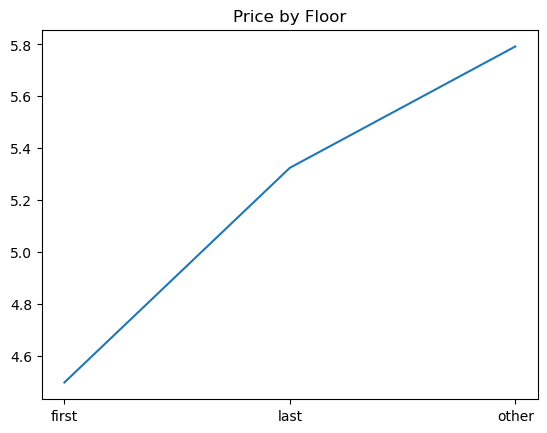

In [144]:
price_change = p_price.pivot_table(index='floor_type', values='price_mill')
plt.plot(price_change)
plt.title('Price by Floor')

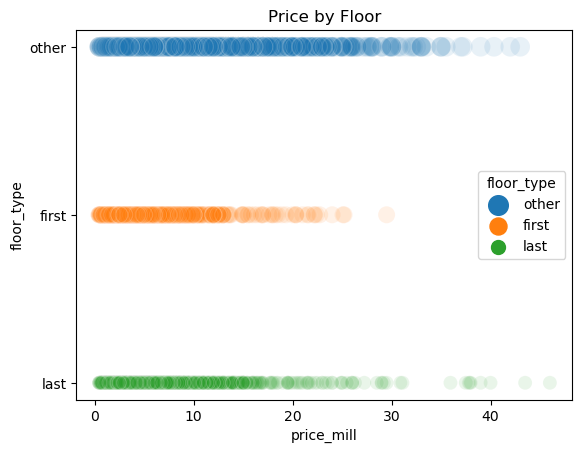

count     median       mean
           price_mill price_mill price_mill
floor_type                                 
first            2693       3.95   4.496126
last             3057       4.25   5.323869
other           15861       4.80   5.791828

In [145]:
sns.scatterplot(x='price_mill', y='floor_type',
                     hue='floor_type', size='floor_type',
                     data=p_price,sizes=(100, 200), alpha=0.1)
plt.title('Price by Floor')
plt.show()
p_price.pivot_table(index='floor_type',values='price_mill',aggfunc=['count','median','mean'])

- It can be seen that apartments located on the ground floor are cheaper.
- Apartments on the middle floors are usually the most expensive.
- Prices for apartments on the top floors are between the prices for the first and middle floors.

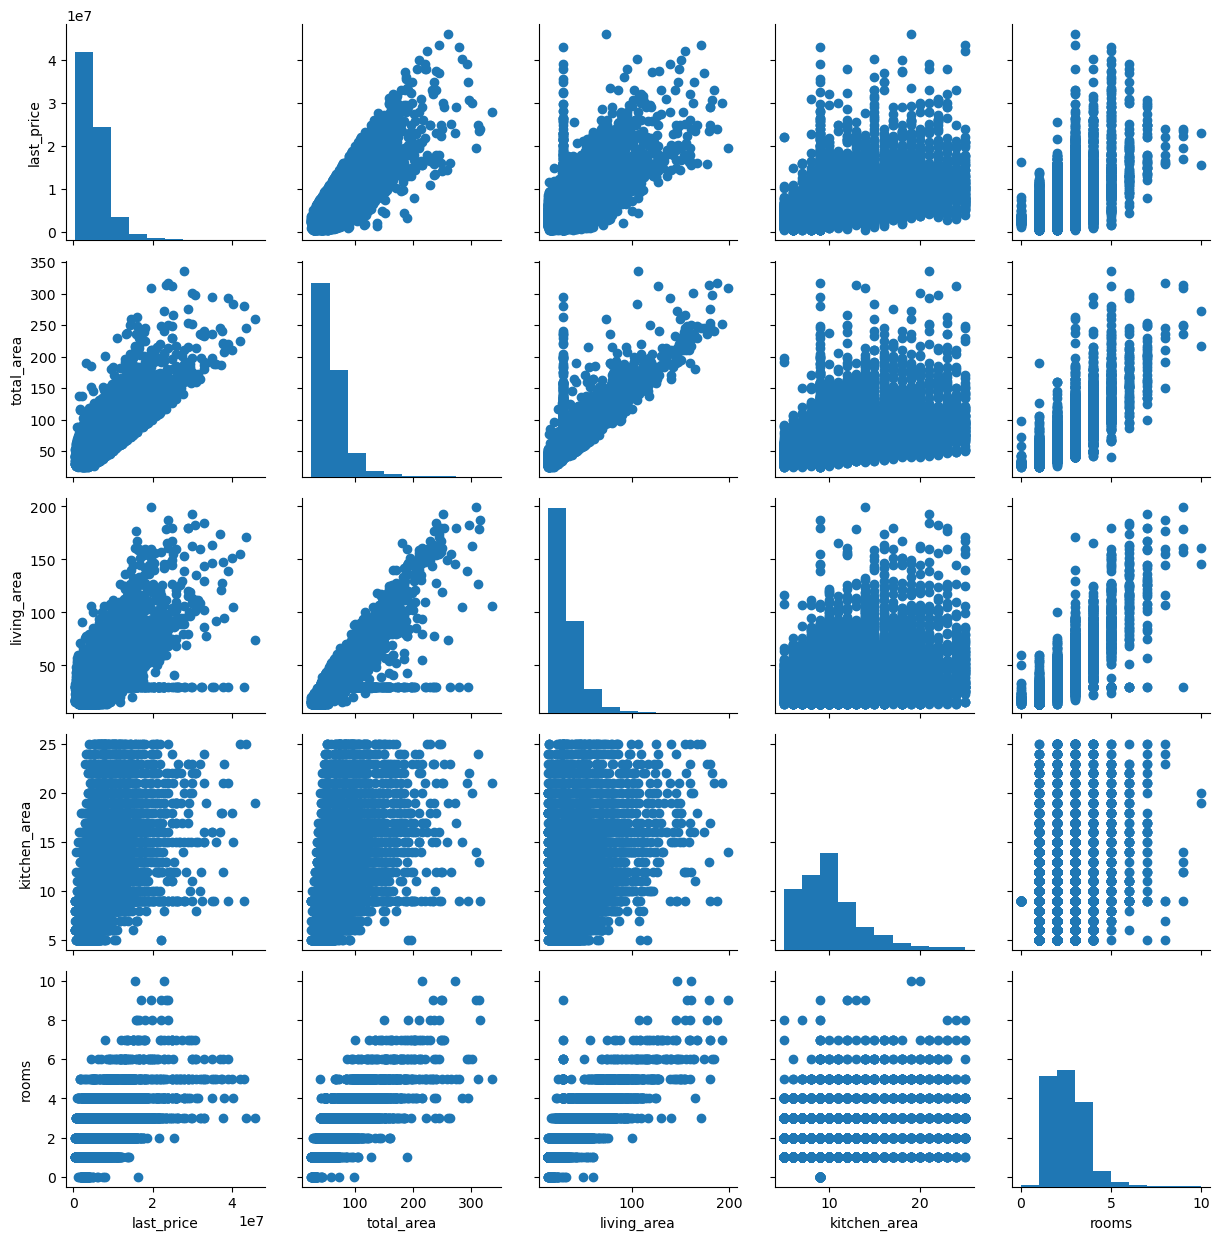

In [146]:
s = sns.PairGrid(data_x)
s.map_diag(plt.hist)
s.map_offdiag(plt.scatter)
plt.show()


- This correlation map is a graphical representation of the previous table. It's worth looking at just the first line at the top, which represents the correlations of price with other values.

# Let's calculate the average price per square meter in the 10 localities with the largest number of advertisements

In [147]:
city_list = data['locality_name'].value_counts().head(10).index.tolist()

In [148]:
good_local = data[data['locality_name'].isin(city_list)]

In [149]:
glt = good_local.pivot_table(index='locality_name', values='price_per_sqm').sort_values(by='price_per_sqm')

In [150]:
# average price per square meter in the city
glt.sort_values(by='price_per_sqm', ascending=False)

price_per_sqm
locality_name                   
санкт-петербург    107830.629850
пушкин             102089.449423
деревня кудрово     92419.333929
посёлок парголово   90072.767984
посёлок мурино      84910.051502
посёлок шушары      77865.030607
колпино             75593.222787
гатчина             68861.694612
всеволожск          67236.285366
выборг              57674.403048

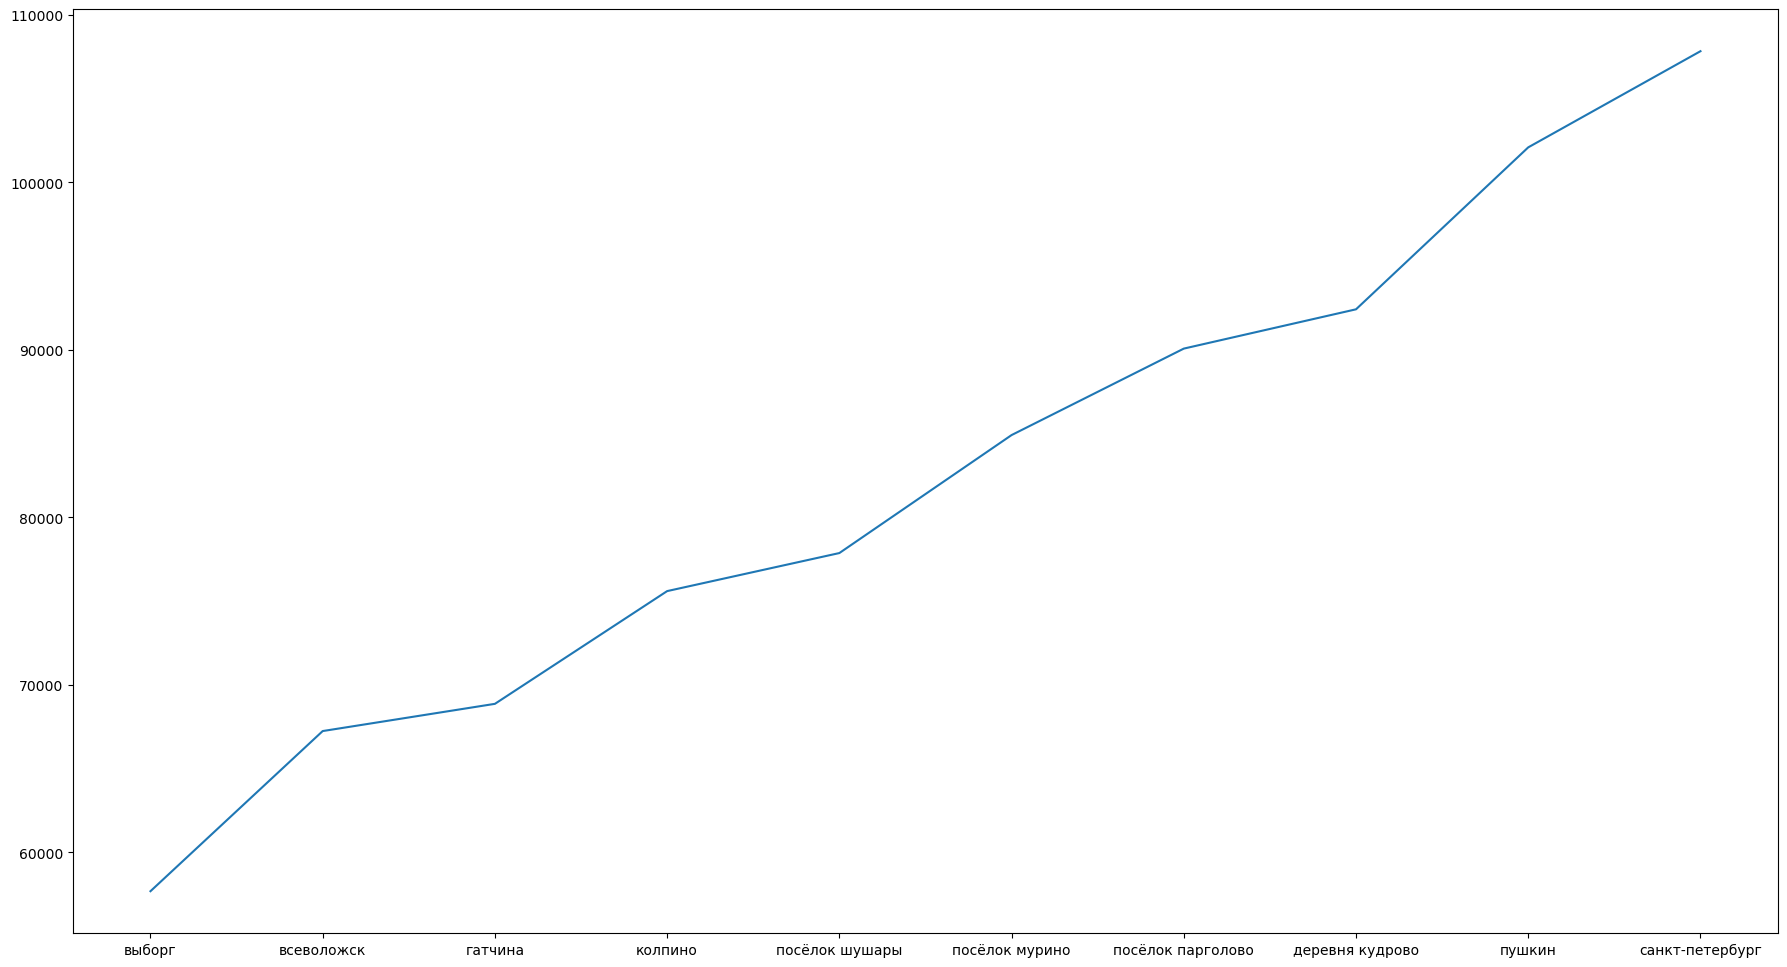

In [151]:
plt.plot(glt)
plt.gcf().set_size_inches(22,12)
plt.show()

- The graph shows that the highest price per square meter of housing is in St. Petersburg. On the other hand, the lowest price is in Vyborg.

# Let's select the apartments in St. Petersburg and calculate the average price per kilometer in order to describe how the objects price depends on the distance to the city center

The average price per km is: 70.96 million rubles
The correlation coefficient between the price of real estate and its distance to the city center: -0.40


<Axes: xlabel='cityCenters_nearest_KM', ylabel='price_in_millions'>

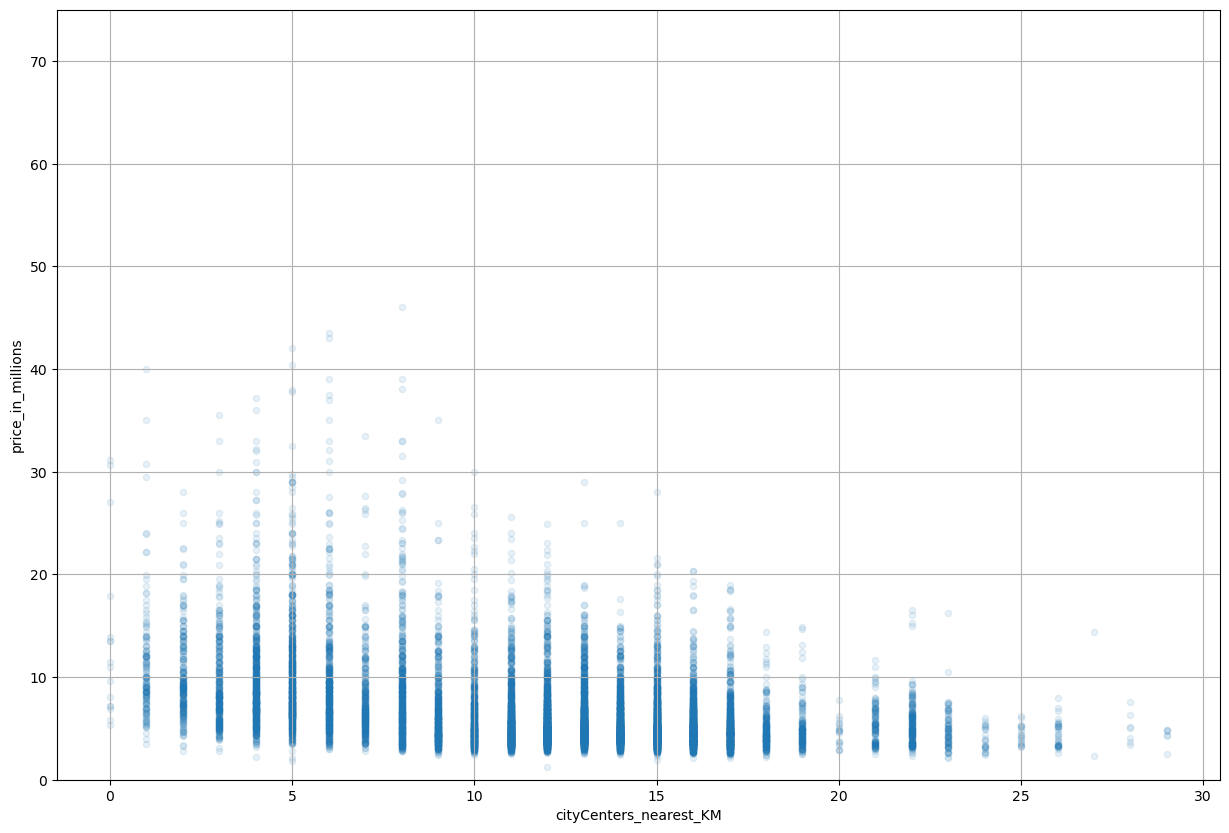

In [152]:
apartments_SP = data[data['locality_name'] == 'санкт-петербург']

apartments_SP['price_in_millions'] = apartments_SP['last_price'].div(1000000)
apartments_SP['price_per_KM'] = pd.Series(dtype='float')

'''

The unit of price assessment is the kilometer, so if the distance is less than one kilometer, the price should be the same 
as one kilometer.

Let's make it so that if the distance is less than 1 km, the price per km is simply the price of the apartment.

'''
                  
mask = (apartments_SP.cityCenters_nearest_KM < 1) 
apartments_SP.loc[mask, 'price_per_KM'] = apartments_SP.loc[mask, 'price_in_millions']

mask2 = (apartments_SP.cityCenters_nearest_KM >= 1) 
apartments_SP.loc[mask2, 'price_per_KM'] = apartments_SP.loc[mask2, 'price_in_millions'] \
*apartments_SP.loc[mask2, 'cityCenters_nearest_KM']


mean_price_per_KM = apartments_SP['price_per_KM'].mean()

price_distance_corr = apartments_SP['price_in_millions'].corr(apartments_SP['cityCenters_nearest_KM'])

print(f'The average price per km is: {mean_price_per_KM:.2f} million rubles')
print(f'The correlation coefficient between the price of real estate and its distance to the city center: {price_distance_corr:.2f}')

apartments_SP.plot(y='price_in_millions', x='cityCenters_nearest_KM', kind='scatter', grid=True, ylim=(0,75), \
                   alpha=0.1, figsize = (15,10))



- The correlation between the price of real estate and its distance from the city center gave a negative value: -0.40. This means that as the price of real estate increases, the distance to the city center decreases, because the correlation value is a tangent with an angle of 40 degrees, which is reflected in the graph.

- The graph shows the correlation. However, it coincides that extremely expensive apartments (possibly elite) are located within a radius of 7.5 km from the center.

- The average price for KM is 70.96 million rubles.

- Since price and distance are indirectly proportional, in order to get the average price at a given distance from the center, we need to divide 70.96 by the distance.

# Conclusion
During the implementation of the project, the following was done:

### Preprocessing stage
- **Primary information was obtained:**

    - total_images — number of photos of the apartment in the ad (int64)
    - last_price — price at the time of removal from publication (float64)
    - total_area — apartment area in square meters (float64)
    - first_day_exposition — publication date (object)
    - rooms — number of rooms (int64)
    - ceiling_height — ceiling height (m) (float64)
    - floors_total - total floors in the house (float64)
    - living_area - living area in square meters (m²)(float64)
    - floor - floor (int64)
    - is_apartment - apartments (boolean type) (object)
    - studio - studio apartment (boolean type) (bool)
    - open_plan - open plan (boolean type) (bool)
    - kitchen_area - kitchen area in square meters (m²) (float64)
    - balcony — number of balconies (float64)
    - locality_name — name of the locality (object)
    - airports_nearest — distance to the nearest airport in meters (m) (float64)>
    - cityCenters_nearest — distance to the city center (m) (float64)
    - parks_nearest — distance to the nearest park (m) (float64)
    - parks_around3000 — number of parks within a 3 km radius (float64)
    - ponds_around3000 — number of ponds within a 3 km radius (float64)
    - ponds_nearest — distance to the nearest body of water (m)(float64)
    - days_exposition — how many days the ad was posted (from publication to removal) (float64)
    - We rendered the first 20 rows to get an idea of what the set looks like.

- **We visualized histograms for each column to see the distribution of values.**

- **We have determined which data types need to be changed.**


- **We ensured that there were no obvious duplicates in the data.**

- **We visualized the gaps in the data:**

    - total_images: 0
    - last_price: 0
    - total_area: 0
    - first_day_exposition: 0
    - rooms: 0
    - ceiling_height: 9195
    - floors_total: 86
    - living_area: 1903
    - floor: 0
    - is_apartment: 20924
    - studio: 0
    - open_plan: 0
    - kitchen_area: 2278
    - balcony: 11519
    - locality_name: 49
    - airports_nearest: 5542
    - cityCenters_nearest: 5519
    - parks_around3000: 5518
    - parks_nearest: 15620
    - ponds_around3000: 5518
    - ponds_nearest: 14589
    - days_exposition: 3181
- **We analyzed the gaps using graphs, histograms and information display techniques and filled them accordingly.**

- **Changed data types to the correct ones.**

- **We also analyzed the anomalies and eliminated them.**


- **New columns were created:**
    - price per square meter: data['price_per_sqm']
    - publication weekday : data['exposition_weekday']
    - publication month : data['exposition_month']
    - year of publication : data['exposition_year']
    - nearest city center in km: data['cityCenters_nearest_KM']
### Analysis stage

- **Using graphs and methods to display information, we have established that:**

    - The average sales rate has been increasing over the years.

    - Slow sales are those that take at least 420 days (beyond the Q3+1.5*IQR limit), and fast sales are those that take less than 3 days.

    - The share of abnormally slow sales from the total is 10.15%.

    - The share of abnormally fast sales from the total is 0.01%

    - Most values are located to the right of the median. To determine the usual sales time, let's take the average value of 169 days.


- **We have created a correlation table and concluded that the factors that most influence the price of housing are the following, classified from most influential to least influential:**

    - 1 Total area
    - 2 Living Area
    - 3 Number of Rooms
    - 4 Kitchen area
- **We also built graphs to trace the relationship between the price of an apartment and other linearly independent parameters:**

    - It can be seen that apartments located on the ground floor are cheaper.
    - Apartments on the middle floors are usually the most expensive.
    - Prices for apartments on the top floors are between the prices for the first and middle floors.
    - Apparently, more expensive apartments are published on Thursdays. From Thursday to Saturday, prices drop sharply. The cheapest apartments are published on Saturday. Prices then rise progressively until Thursday.

    - Regarding the month, the correlation, as with days, is insignificant, but we can say that apartments published in December are slightly more expensive.

    - From 2014 to 2016, prices plummeted from about 9 million to just over five and a half million. After 2016, prices continue to fall, but not very significantly. After 2018, they begin to grow again at the same rhythm without significant volatility. In the periods from 2016 to 2019, prices remain in the range of 5.5-6 million.


- **We have created a table and graph with the average price per square meter for the ten cities where the most apartments are published and we found out that:**
    - The highest price per square meter of housing is in St. Petersburg. 
    - The lowest price is in Vyborg.

- **We calculated the average price per kilometer and the relationship between the price of housing and its distance from the city center:**

    - The correlation between the price of real estate and its distance from the city center gave a negative value: -0.40. This means that as the price of real estate increases, the distance to the city center decreases, because the correlation value is a tangent with an angle of 40 degrees, which is reflected in the graph.

    - The graph shows the correlation. However, it coincides that extremely expensive apartments (possibly elite) are located within a radius of 7.5 km from the center.

    - The average price for KM is 70.96 million rubles.

    - Since price and distance are indirectly proportional, in order to get the average price at a given distance from the center, we need to divide 70.96 by the distance.